In [2]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm 

import functools as ft
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('med_df.csv')

In [3]:
df

fips             county    state  analysis_value  \
0      1001     Autauga County  ALABAMA             588   
1      1003     Baldwin County  ALABAMA             608   
2      1005     Barbour County  ALABAMA             747   
3      1007        Bibb County  ALABAMA             593   
4      1009      Blount County  ALABAMA             601   
...     ...                ...      ...             ...   
3137  56037  Sweetwater County  WYOMING             510   
3138  56039       Teton County  WYOMING             358   
3139  56041       Uinta County  WYOMING             538   
3140  56043    Washakie County  WYOMING             665   
3141  56045      Weston County  WYOMING             493   

      Primary care physicians: Primary Care Physicians Rate  \
0                                              44.74753       
1                                              68.98591       
2                                              36.45791       
3                                              58.05126       
4                                              22.48124       
...                                                 ...       
3137                                           44.87164       
3138                                          115.06989       
3139                                           44.49718       
3140                                           64.06150       
3141                                           43.30879       

      Primary care physicians: Primary Care Physicians Ratio  \
0                                                2235.0        
1                                                1450.0        
2                                                2743.0        
3                                                1723.0        
4                                                4448.0        
...                                                 ...        
3137                                             2229.0        
3138                                              869.0        
3139                                             2247.0        
3140                                             1561.0        
3141                                             2309.0        

      Dentists: Dentist Rate  Dentists: Dentist Ratio  \
0                   33.84095                   2955.0   
1                   48.84708                   2047.0   
2                   36.60173                   2732.0   
3                   27.10517                   3689.0   
4                   19.00517                   5262.0   
...                      ...                      ...   
3137                58.58505                   1707.0   
3138                93.62897                   1068.0   
3139                84.09597                   1189.0   
3140                90.20619                   1109.0   
3141                74.15097                   1349.0   

      Mental health providers: Mental Health Provider Rate  \
0                                              37.40315      
1                                              99.43869      
2                                              24.40115      
3                                              27.10517      
4                                              17.27742      
...                                                 ...      
3137                                          246.05723      
3138                                          544.75039      
3139                                          366.06480      
3140                                          399.48454      
3141                                          177.96233      

      Mental health providers: Mental Health Provider Ratio  \
0                                                2674.0       
1                                                1006.0       
2                                                4098.0       
3                                                3689.0       
4                          

<AxesSubplot:>

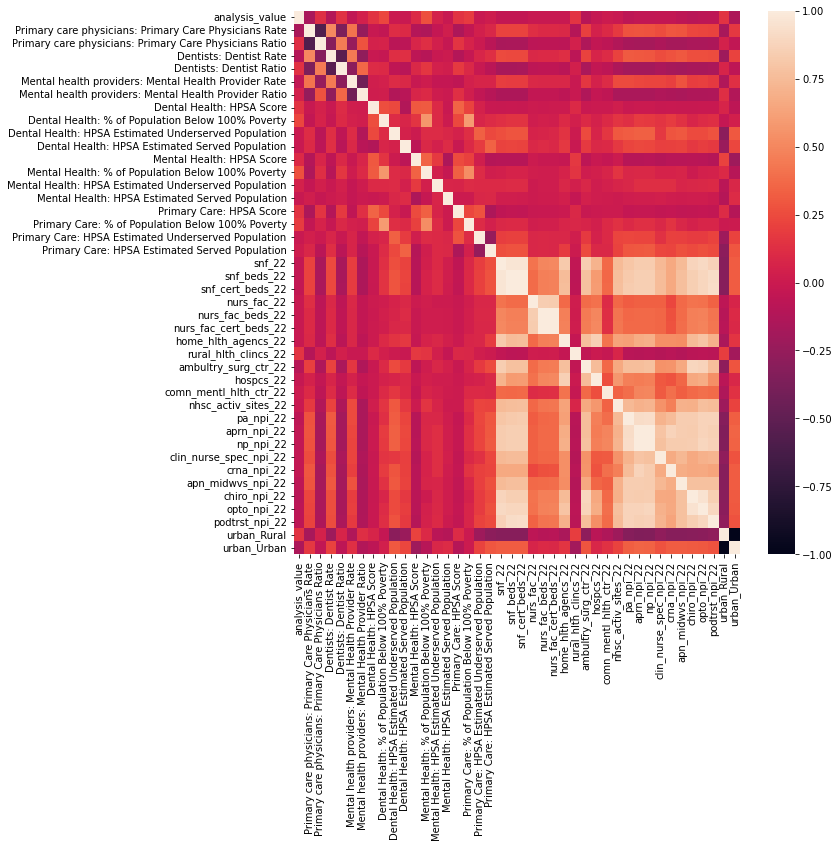

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=df[[column for column in df.columns if column not in ['fips','county','state']]].corr())

<AxesSubplot:>

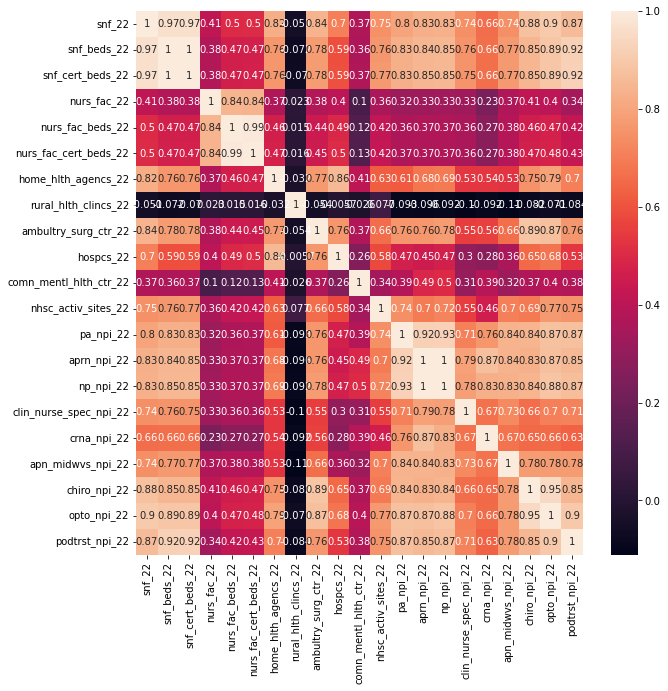

In [4]:
#There seems to be high correlation with the AHRF data, let's examine it more closely
subset = df[['snf_22','snf_beds_22', 'snf_cert_beds_22', 'nurs_fac_22', 'nurs_fac_beds_22',
       'nurs_fac_cert_beds_22', 'home_hlth_agencs_22', 'rural_hlth_clincs_22',
       'ambultry_surg_ctr_22', 'hospcs_22', 'comn_mentl_hlth_ctr_22',
       'nhsc_activ_sites_22', 'pa_npi_22', 'aprn_npi_22', 'np_npi_22',
       'clin_nurse_spec_npi_22', 'crna_npi_22', 'apn_midwvs_npi_22',
       'chiro_npi_22', 'opto_npi_22', 'podtrst_npi_22']]

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=subset.corr(),annot=True)

<AxesSubplot:>

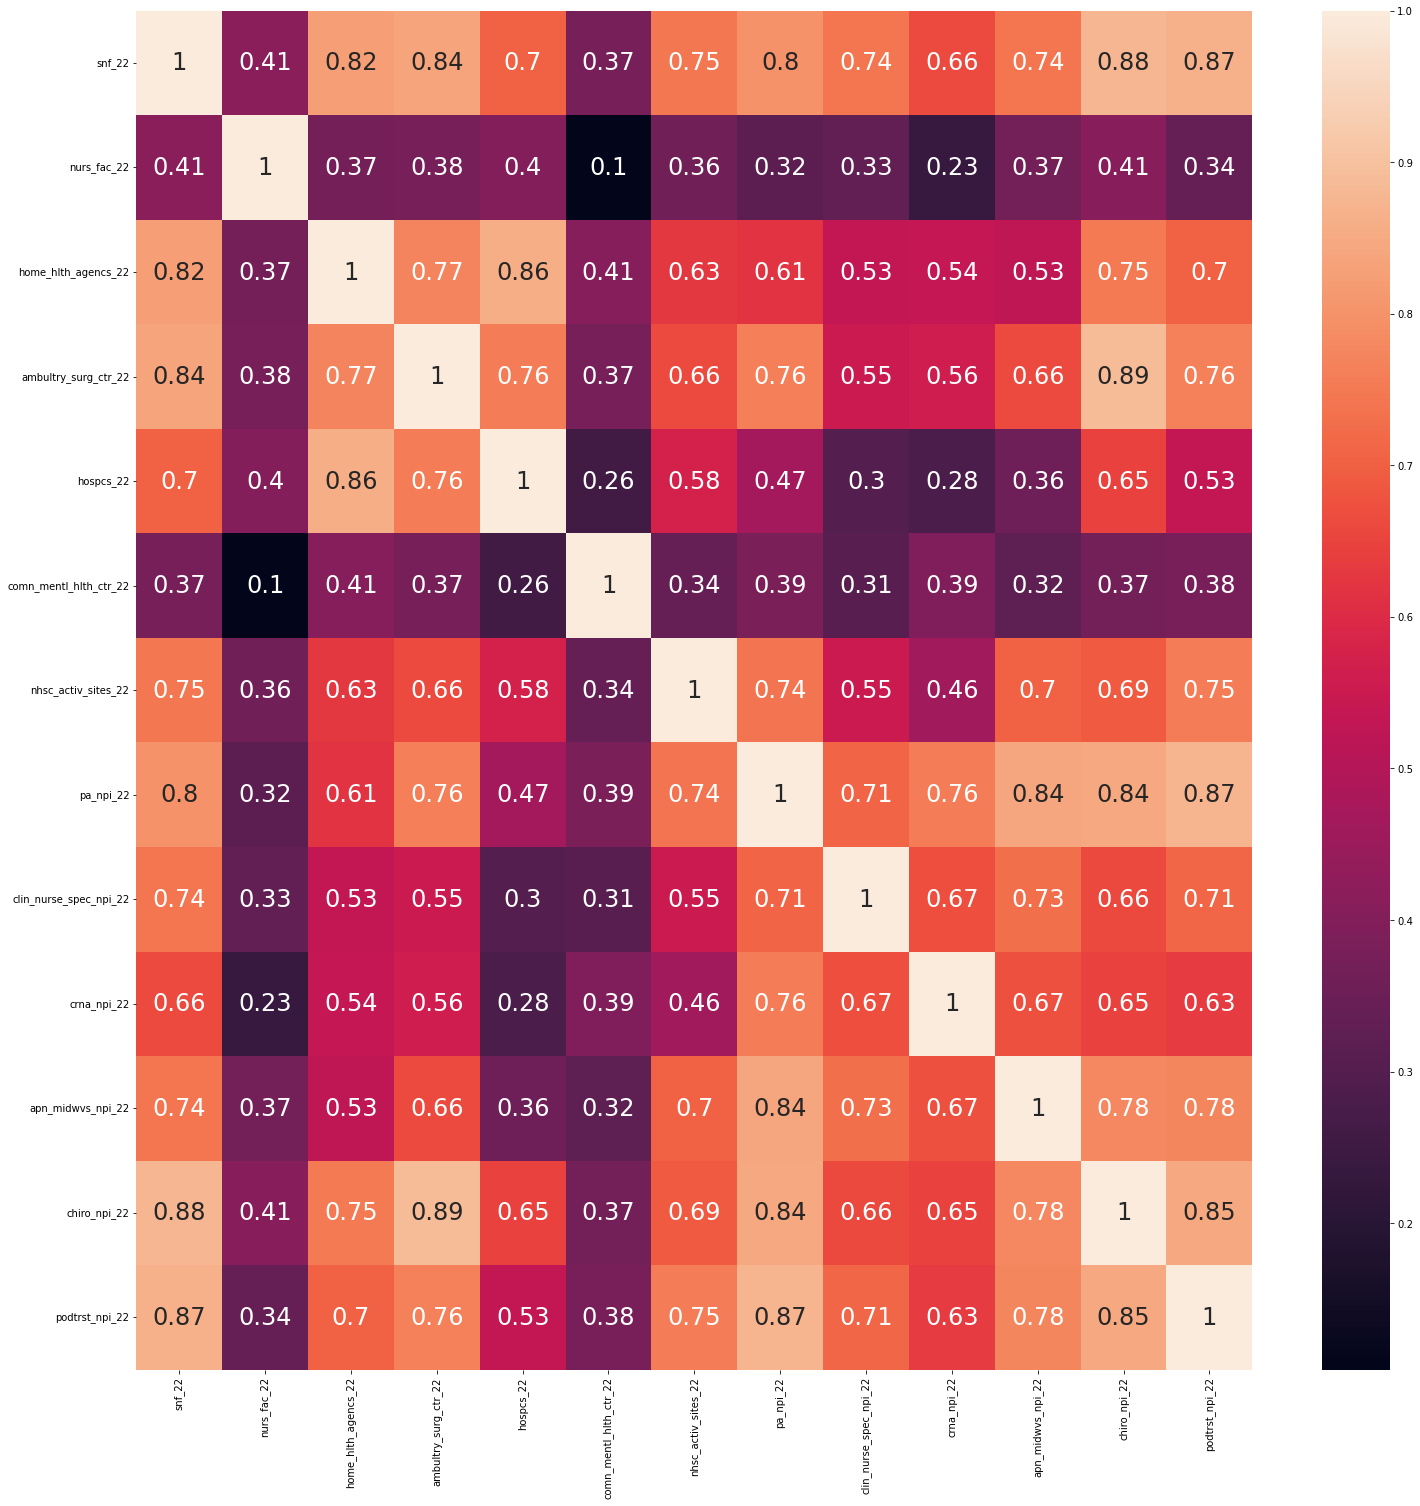

In [7]:
drop_list = ['snf_beds_22','snf_cert_beds_22','nurs_fac_beds_22','nurs_fac_cert_beds_22','rural_hlth_clincs_22','np_npi_22',\
             'opto_npi_22','aprn_npi_22']
#beds are redundant and almost completely linearly correlated with the facilities they are found in. 
#np is directly correlated with aprn, probably since they're both types of nurses
#optometrists were directly correlated with chiropractors and podiatrists, so we will remove optometrists from the dataset
#we realized that aprn is highly correlated with pa as well, so we will remove aprn since pa has less correlation with other variables. 
subset2 = [feature for feature in subset if feature not in drop_list]
df2 = df.drop(drop_list,axis=1)
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df2[subset2].corr(),annot=True,annot_kws={"size":24})

<AxesSubplot:>

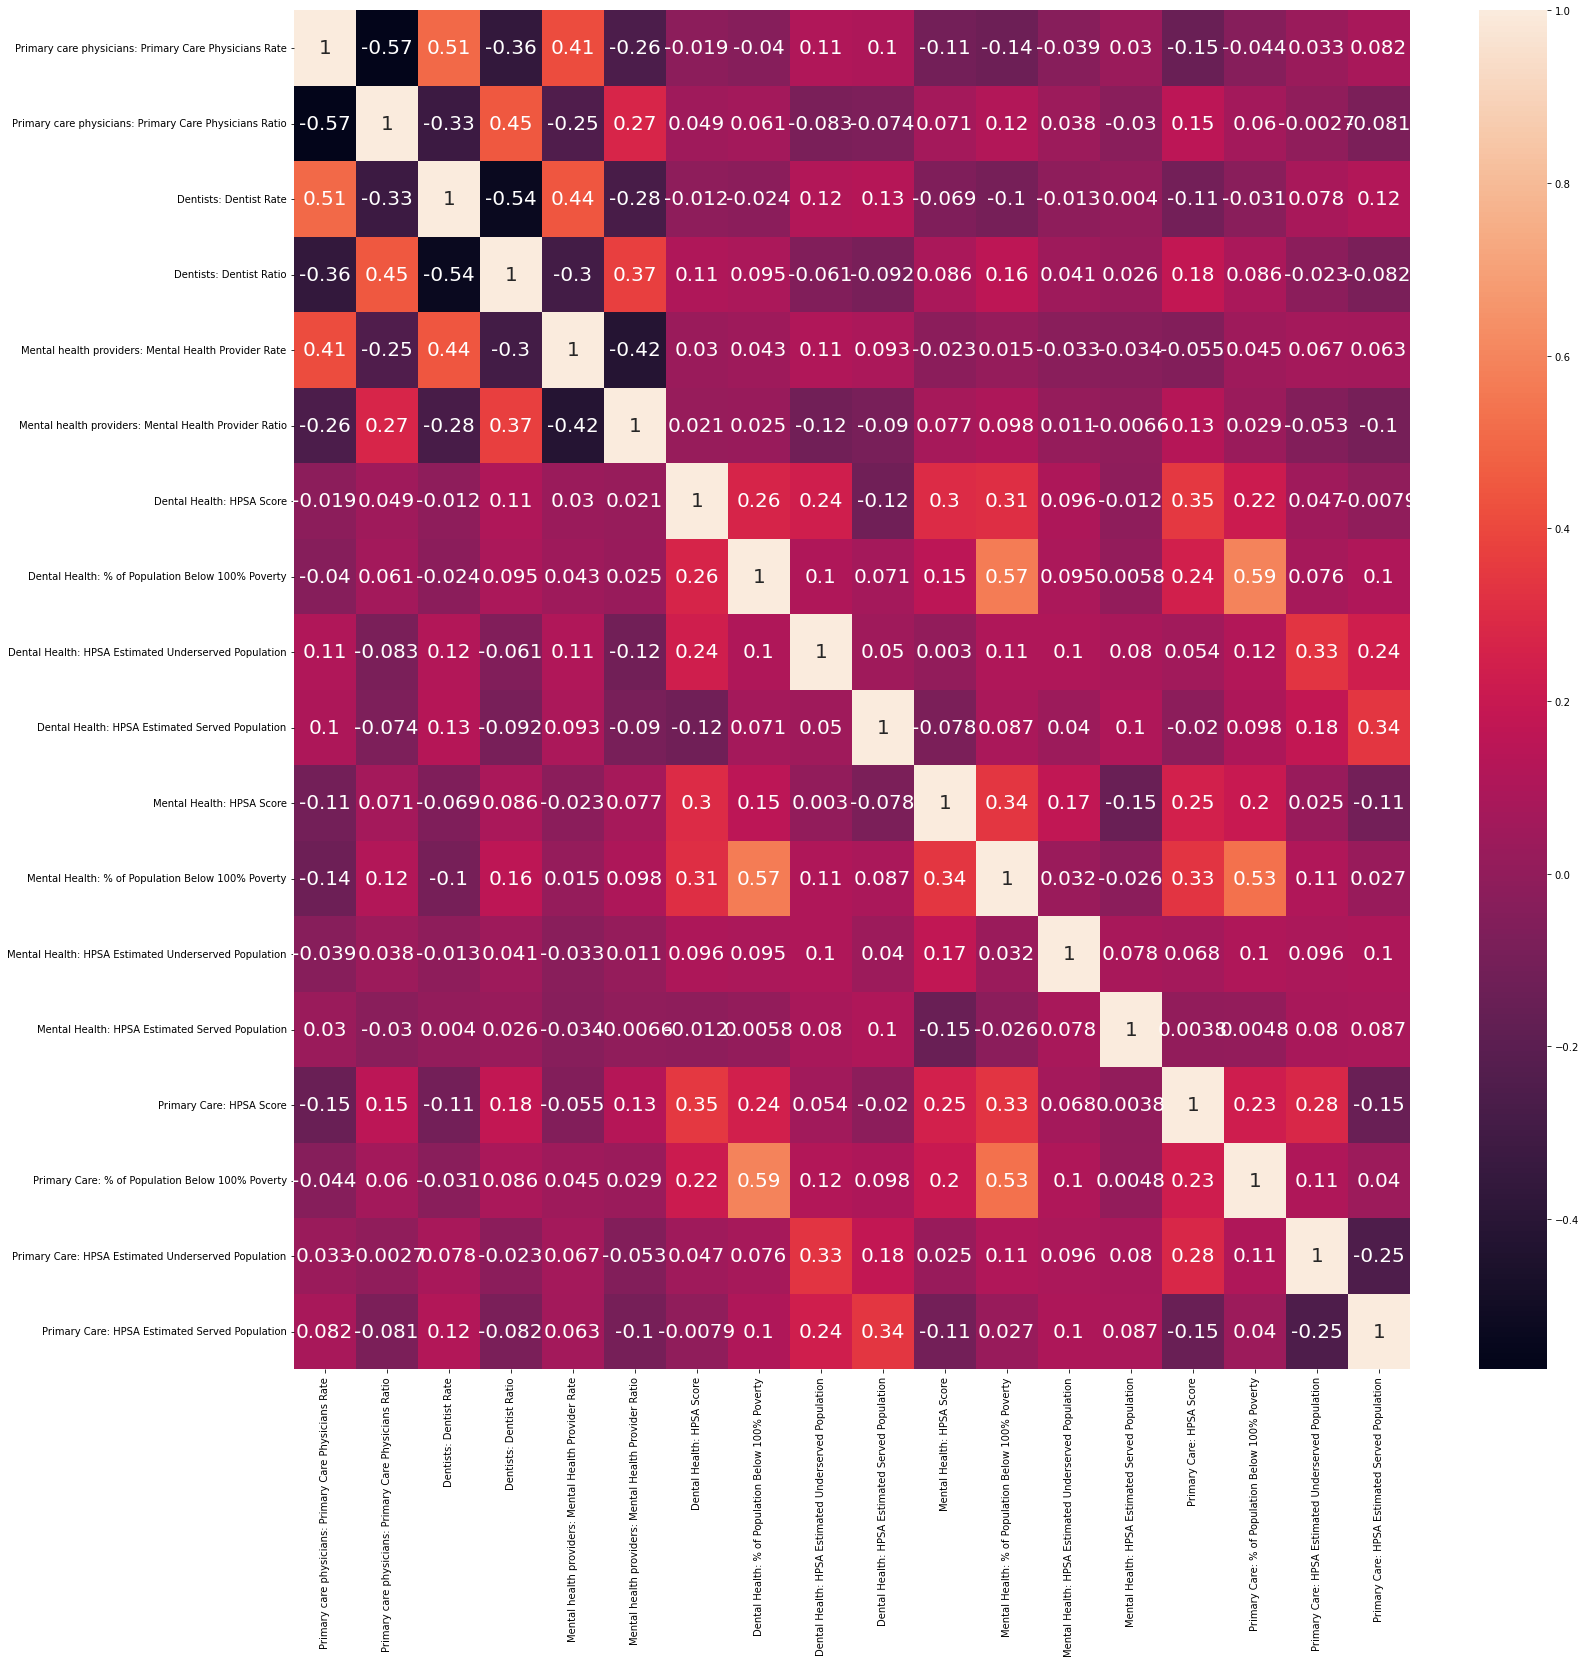

In [8]:
subset3 = ['Primary care physicians: Primary Care Physicians Rate',
       'Primary care physicians: Primary Care Physicians Ratio',
       'Dentists: Dentist Rate', 'Dentists: Dentist Ratio',
       'Mental health providers: Mental Health Provider Rate',
       'Mental health providers: Mental Health Provider Ratio',
       'Dental Health: HPSA Score',
       'Dental Health: % of Population Below 100% Poverty',
       'Dental Health: HPSA Estimated Underserved Population',
       'Dental Health: HPSA Estimated Served Population',
       'Mental Health: HPSA Score',
       'Mental Health: % of Population Below 100% Poverty',
       'Mental Health: HPSA Estimated Underserved Population',
       'Mental Health: HPSA Estimated Served Population',
       'Primary Care: HPSA Score',
       'Primary Care: % of Population Below 100% Poverty',
       'Primary Care: HPSA Estimated Underserved Population',
       'Primary Care: HPSA Estimated Served Population']
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(data=df2[subset3].corr(),annot=True,annot_kws={"size":20})

<AxesSubplot:>

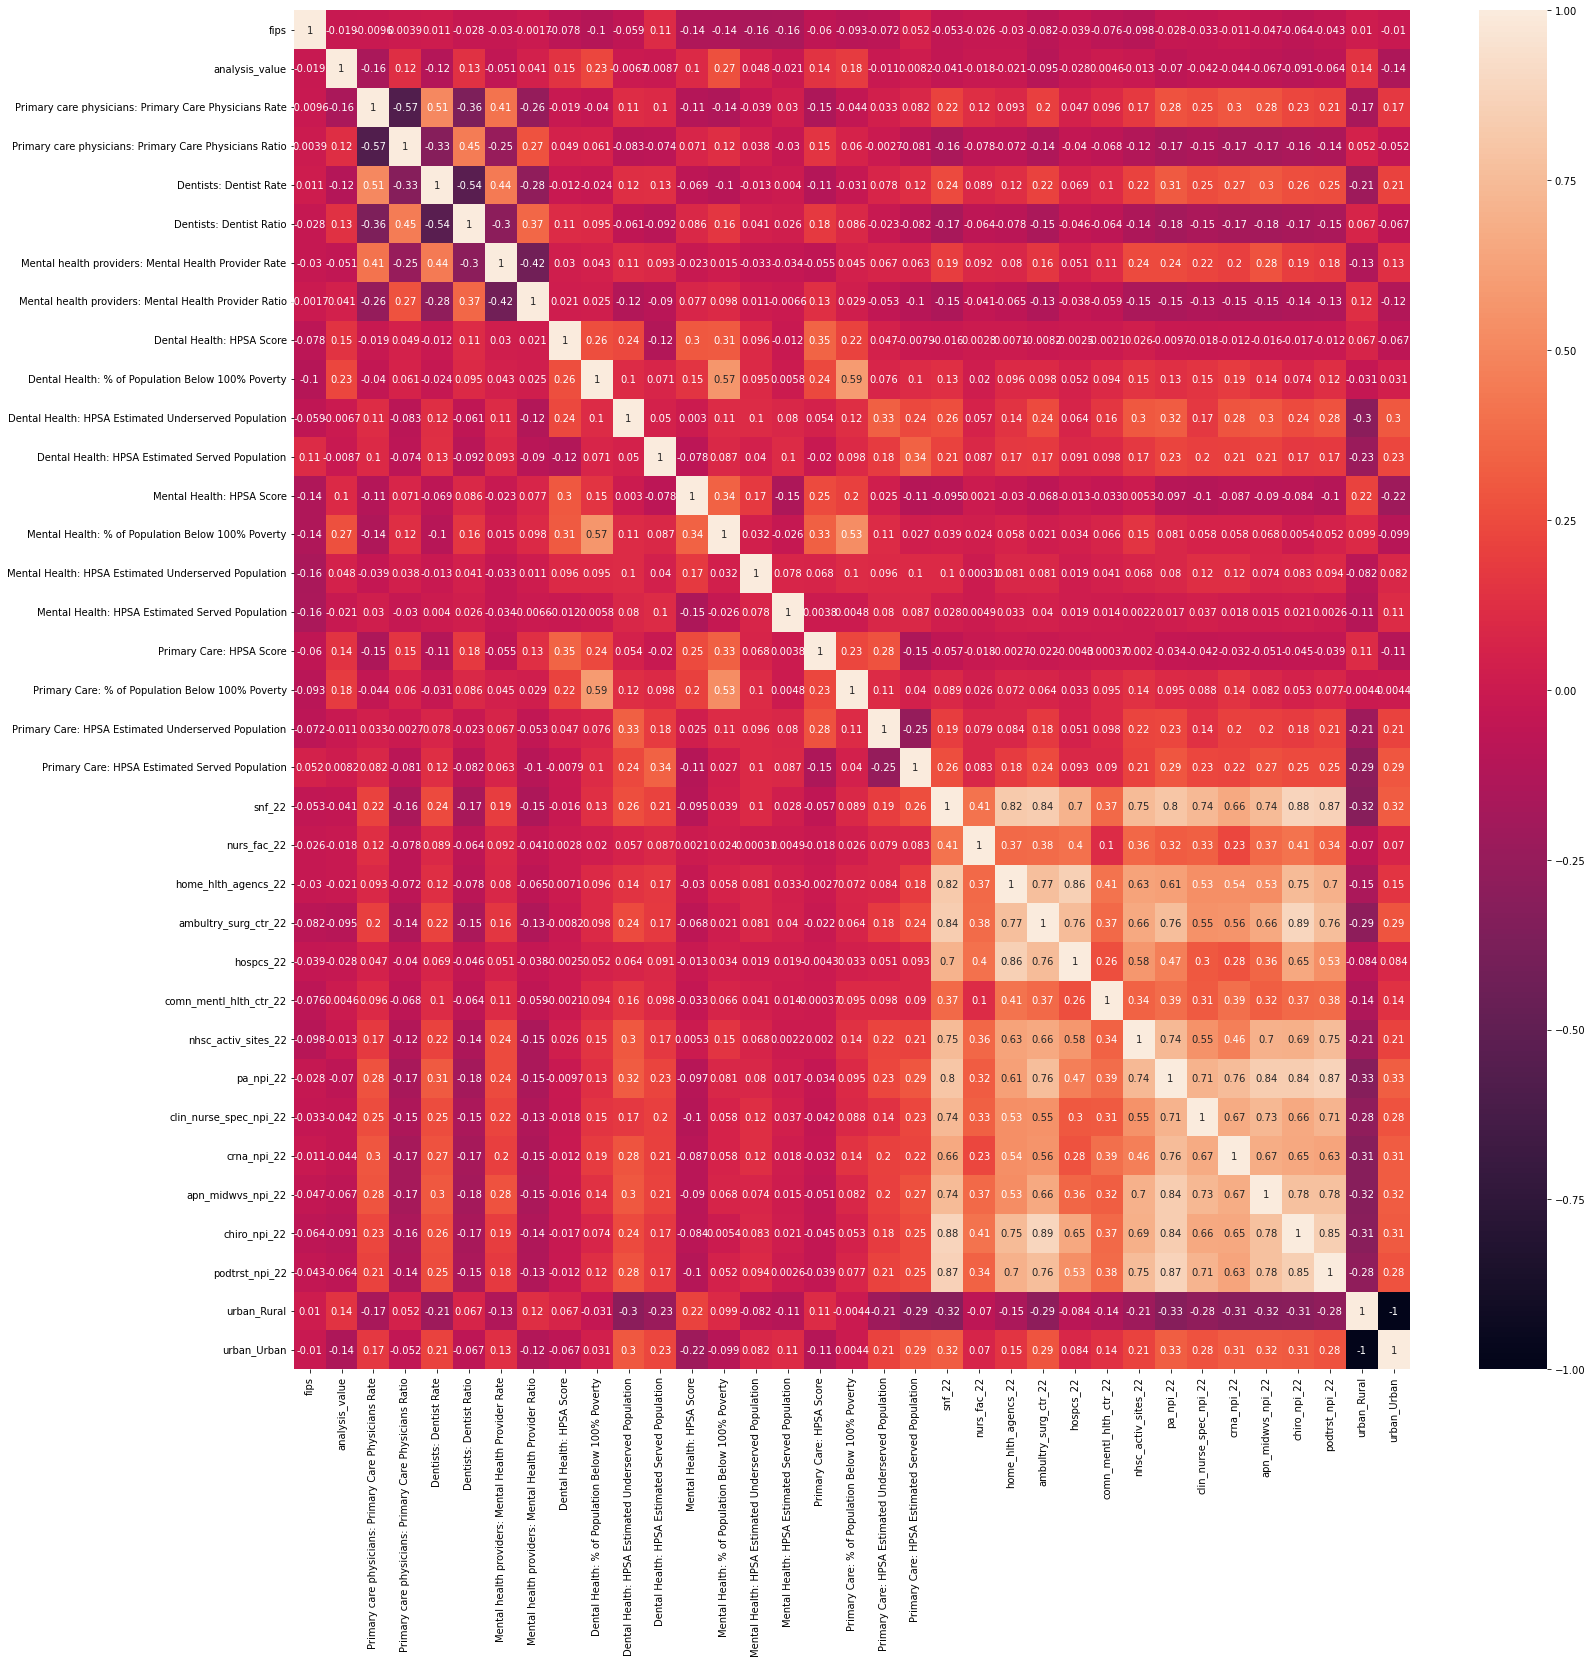

In [59]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(data=df2.corr(),annot=True,annot_kws={"size":10})

In [9]:
df3 = df2.drop('urban_Urban',axis=1)

In [42]:
def create_plot(data,reference):
    fig, ax = plt.subplots(figsize=(5,5))
    sns.histplot(data=data,x=reference)
column_list = [column for column in df3.columns if column not in['fips','county','state','analysis_value']]
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df[variable],bins=30)
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()

In [9]:
column_list

['Primary care physicians: Primary Care Physicians Rate',
 'Primary care physicians: Primary Care Physicians Ratio',
 'Dentists: Dentist Rate',
 'Dentists: Dentist Ratio',
 'Mental health providers: Mental Health Provider Rate',
 'Mental health providers: Mental Health Provider Ratio',
 'Dental Health: HPSA Score',
 'Dental Health: % of Population Below 100% Poverty',
 'Dental Health: HPSA Estimated Underserved Population',
 'Dental Health: HPSA Estimated Served Population',
 'Mental Health: HPSA Score',
 'Mental Health: % of Population Below 100% Poverty',
 'Mental Health: HPSA Estimated Underserved Population',
 'Mental Health: HPSA Estimated Served Population',
 'Primary Care: HPSA Score',
 'Primary Care: % of Population Below 100% Poverty',
 'Primary Care: HPSA Estimated Underserved Population',
 'Primary Care: HPSA Estimated Served Population',
 'snf_22',
 'nurs_fac_22',
 'home_hlth_agencs_22',
 'ambultry_surg_ctr_22',
 'hospcs_22',
 'comn_mentl_hlth_ctr_22',
 'nhsc_activ_sites_22

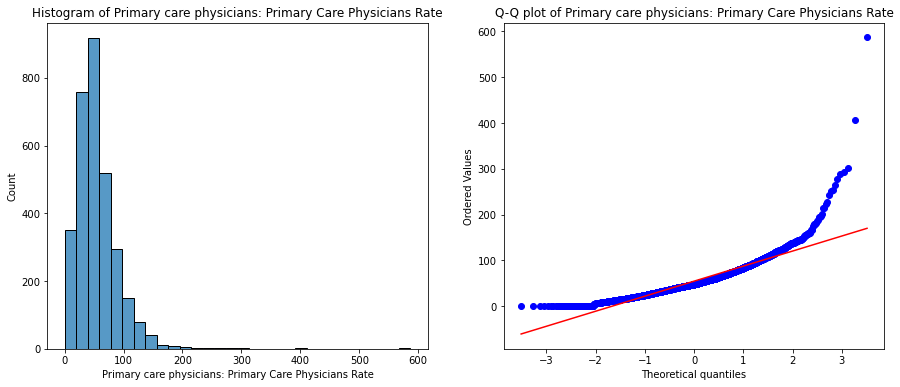

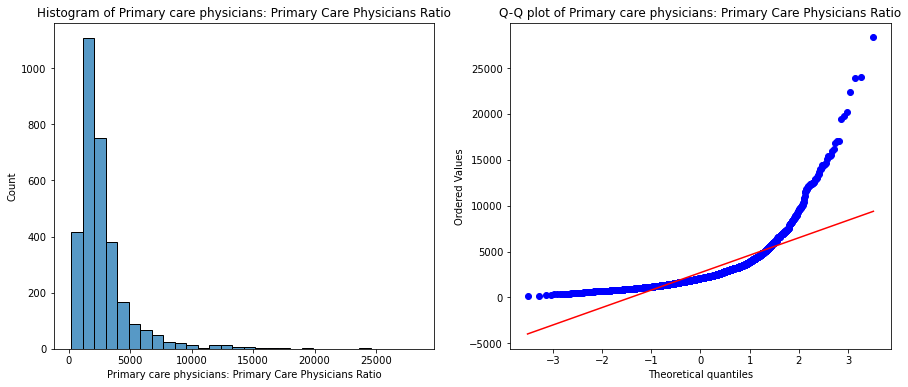

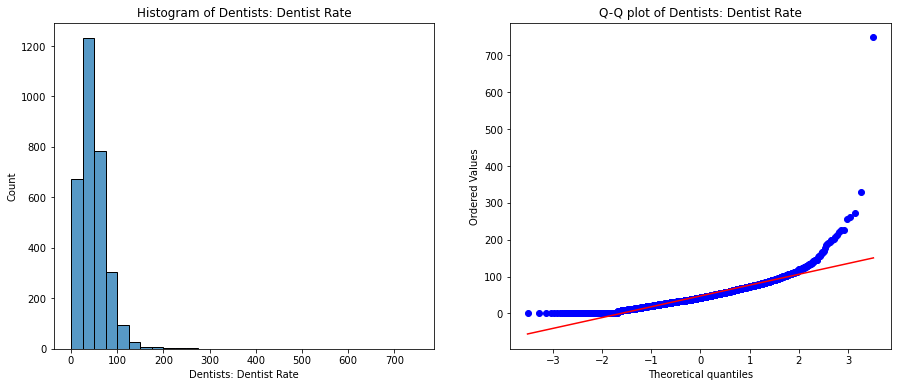

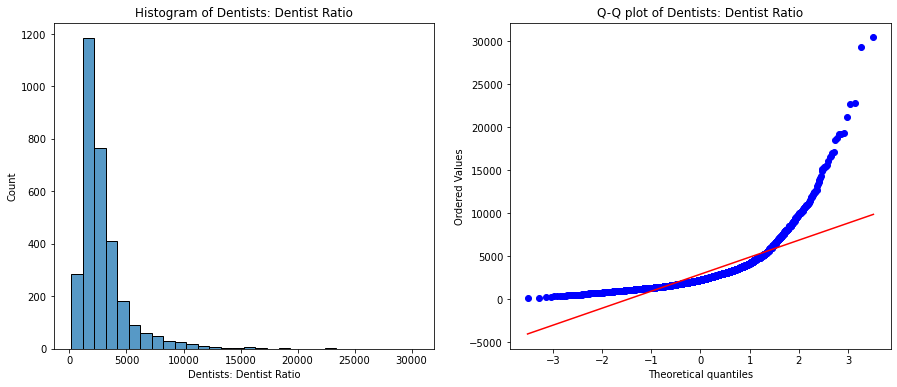

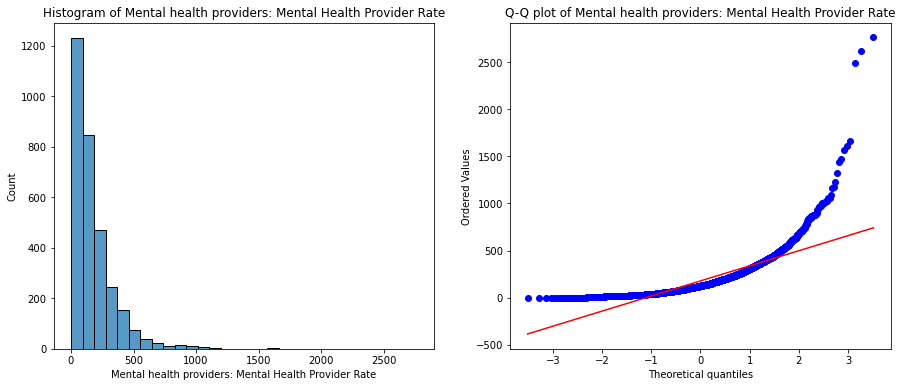

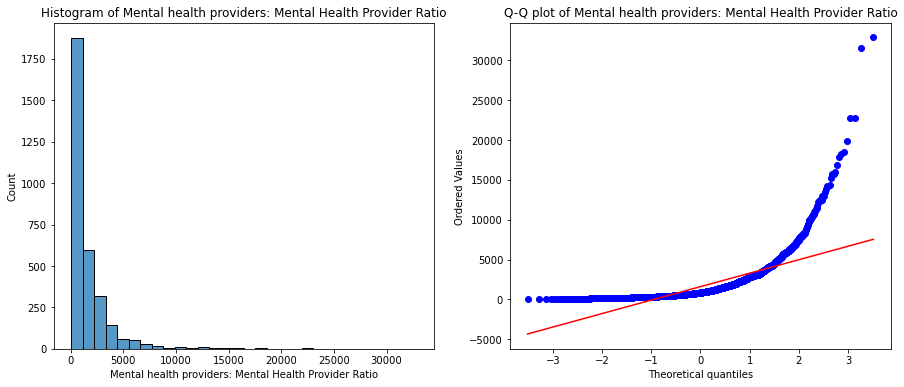

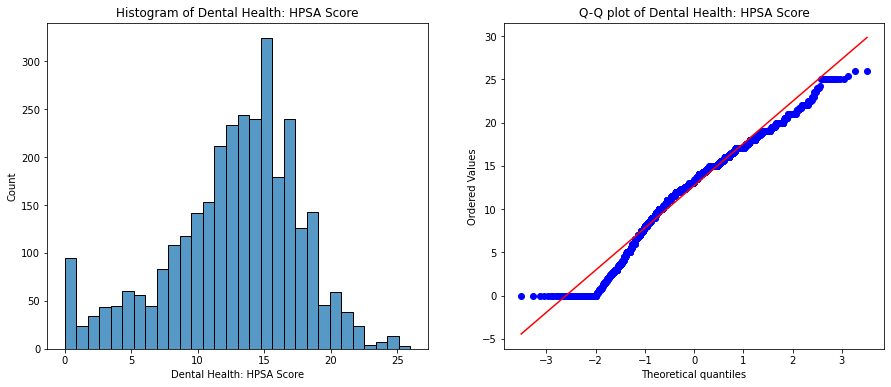

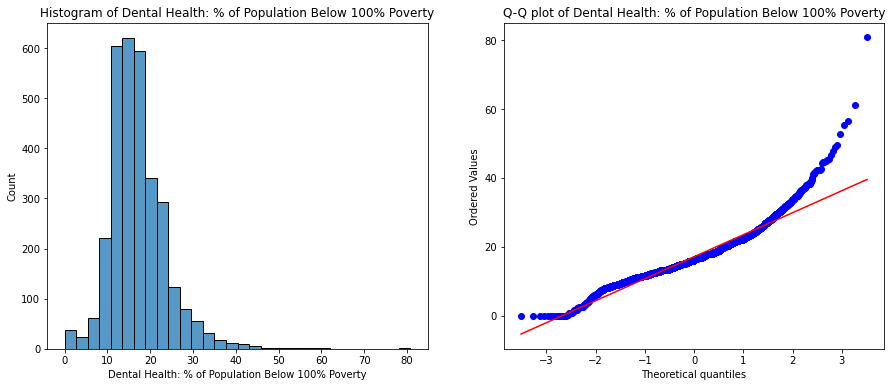

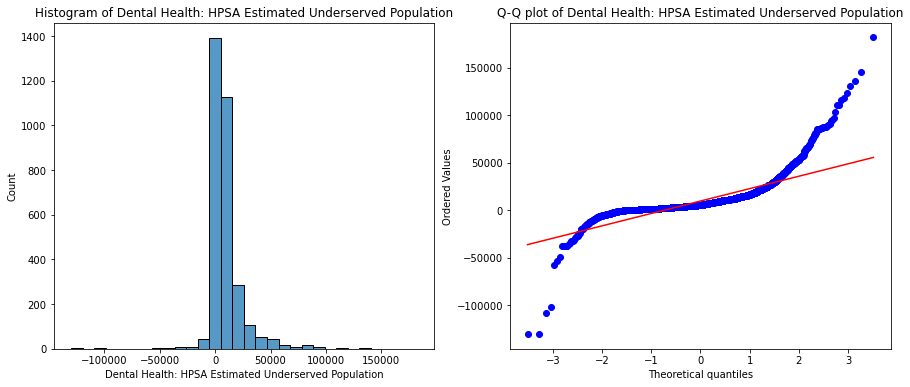

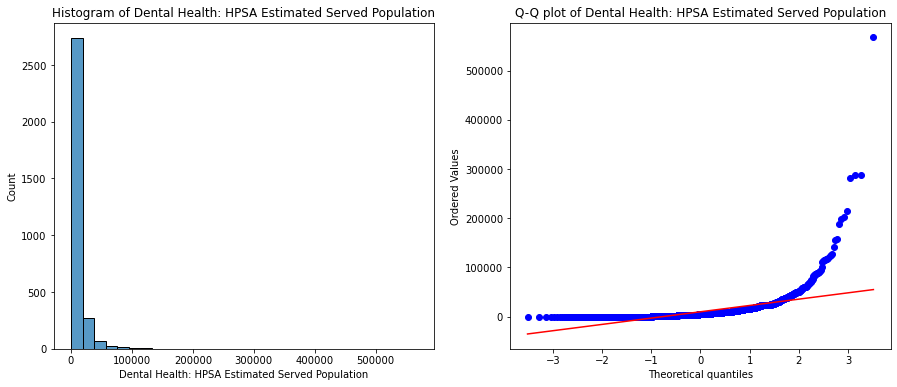

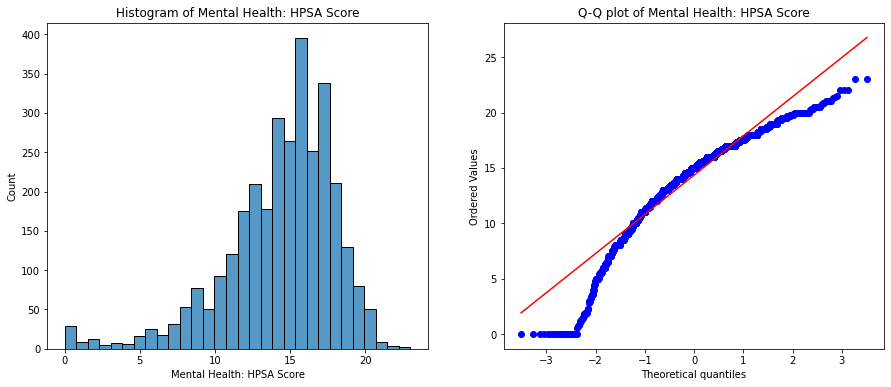

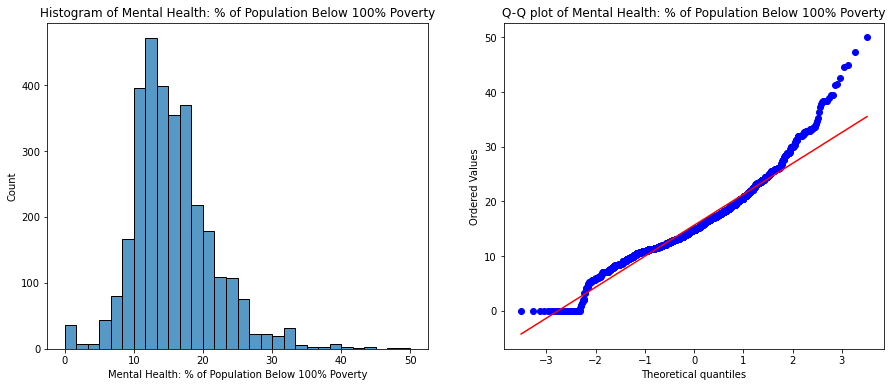

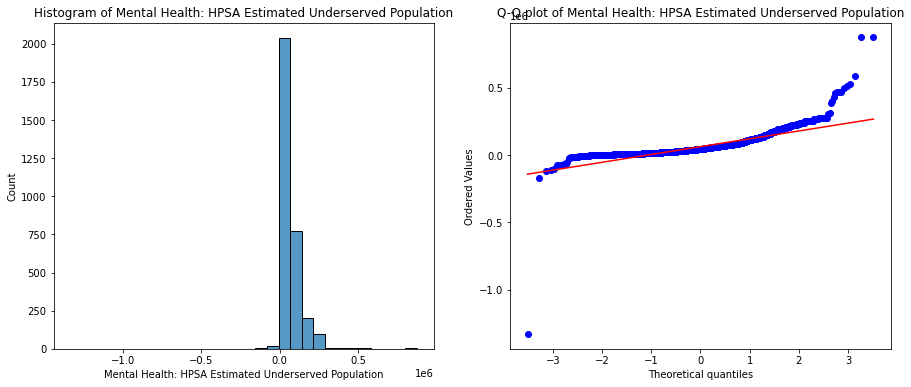

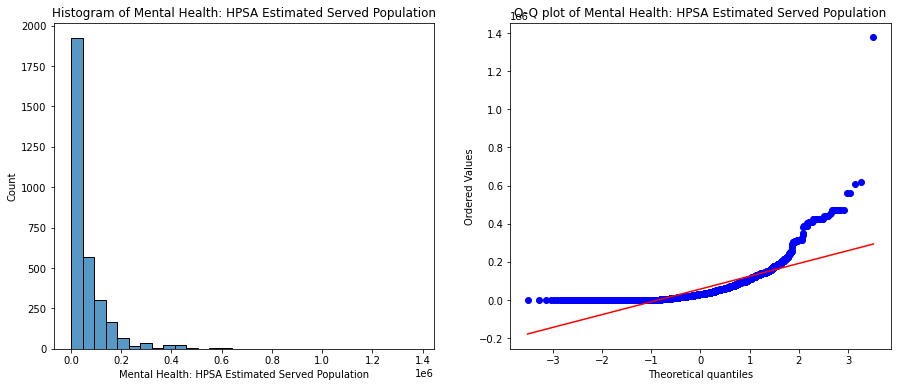

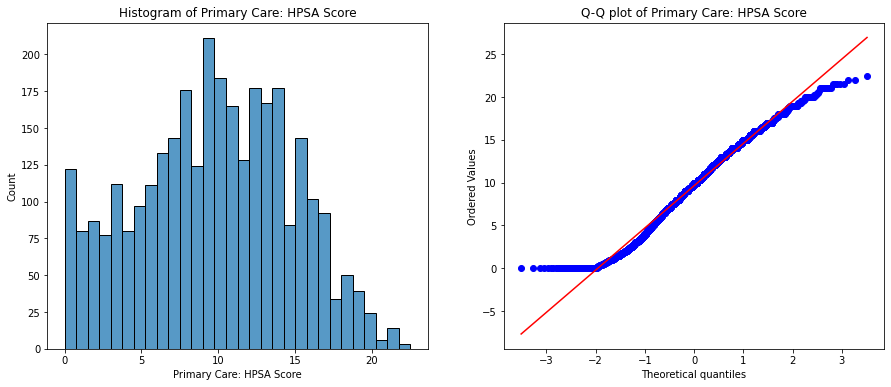

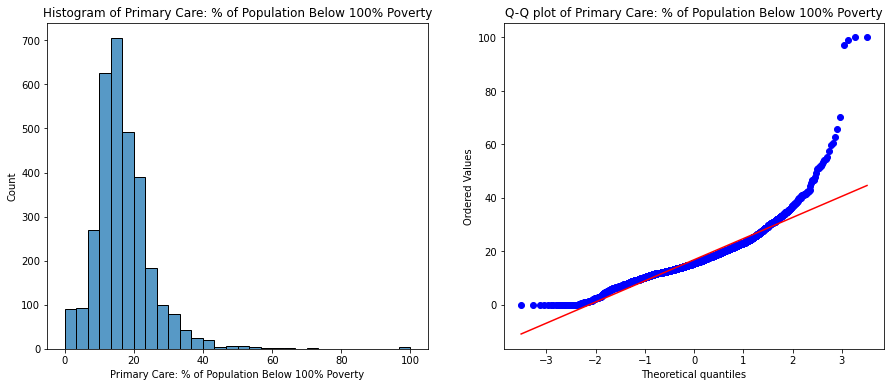

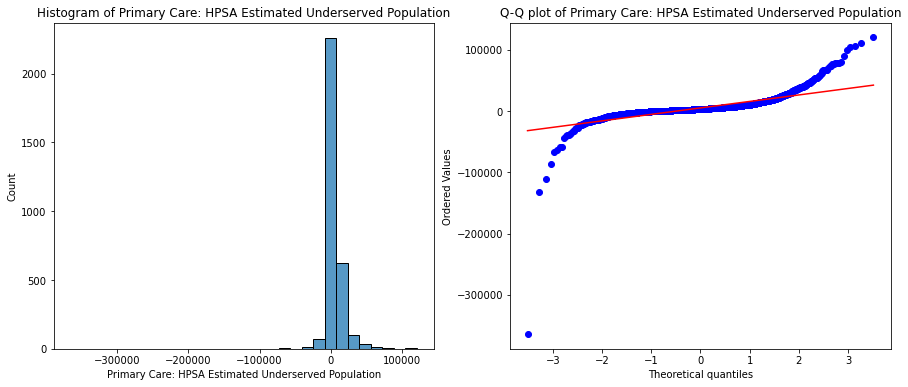

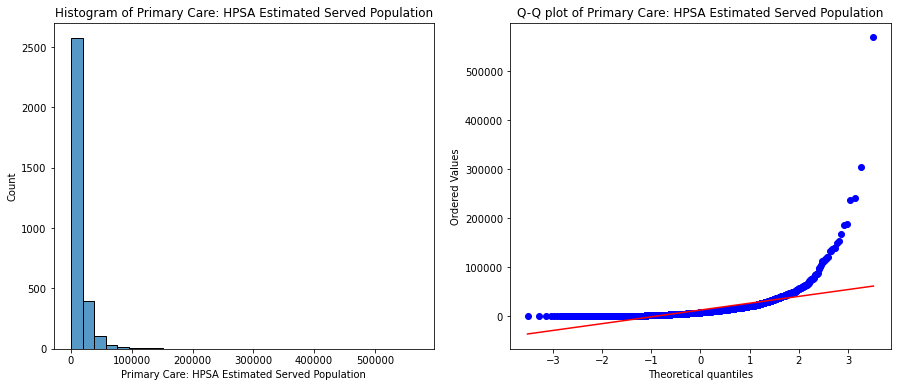

In [43]:
subset1 = ['Primary care physicians: Primary Care Physicians Rate',
 'Primary care physicians: Primary Care Physicians Ratio',
 'Dentists: Dentist Rate',
 'Dentists: Dentist Ratio',
 'Mental health providers: Mental Health Provider Rate',
 'Mental health providers: Mental Health Provider Ratio',
 'Dental Health: HPSA Score',
 'Dental Health: % of Population Below 100% Poverty',
 'Dental Health: HPSA Estimated Underserved Population',
 'Dental Health: HPSA Estimated Served Population',
 'Mental Health: HPSA Score',
 'Mental Health: % of Population Below 100% Poverty',
 'Mental Health: HPSA Estimated Underserved Population',
 'Mental Health: HPSA Estimated Served Population',
 'Primary Care: HPSA Score',
 'Primary Care: % of Population Below 100% Poverty',
 'Primary Care: HPSA Estimated Underserved Population',
 'Primary Care: HPSA Estimated Served Population']
for column in subset1:
    diagnostic_plots(df3,column)

In [49]:
variables = ['Primary care physicians: Primary Care Physicians Ratio',
 'Dentists: Dentist Ratio',
 'Mental health providers: Mental Health Provider Ratio']


In [47]:
from feature_engine.transformation import LogCpTransformer
lct = LogCpTransformer()
df_copy = df3.copy()
lct.fit(df_copy[variables])

LogCpTransformer()

In [50]:
df_copy[variables] = lct.transform(df_copy[variables])
df_copy

fips             county    state  analysis_value  \
0      1001     Autauga County  ALABAMA             588   
1      1003     Baldwin County  ALABAMA             608   
2      1005     Barbour County  ALABAMA             747   
3      1007        Bibb County  ALABAMA             593   
4      1009      Blount County  ALABAMA             601   
...     ...                ...      ...             ...   
3137  56037  Sweetwater County  WYOMING             510   
3138  56039       Teton County  WYOMING             358   
3139  56041       Uinta County  WYOMING             538   
3140  56043    Washakie County  WYOMING             665   
3141  56045      Weston County  WYOMING             493   

      Primary care physicians: Primary Care Physicians Rate  \
0                                              44.74753       
1                                              68.98591       
2                                              36.45791       
3                                              58.05126       
4                                              22.48124       
...                                                 ...       
3137                                           44.87164       
3138                                          115.06989       
3139                                           44.49718       
3140                                           64.06150       
3141                                           43.30879       

      Primary care physicians: Primary Care Physicians Ratio  \
0                                              5.180577        
1                                              5.178352        
2                                              5.181654        
3                                              5.179229        
4                                              5.184240        
...                                                 ...        
3137                                           5.180563        
3138                                           5.175845        
3139                                           5.180605        
3140                                           5.178725        
3141                                           5.180747        

      Dentists: Dentist Rate  Dentists: Dentist Ratio  \
0                   33.84095                 4.963096   
1                   48.84708                 4.960660   
2                   36.60173                 4.962572   
3                   27.10517                 4.964585   
4                   19.00517                 4.966987   
...                      ...                      ...   
3137                58.58505                 4.959473   
3138                93.62897                 4.956479   
3139                84.09597                 4.957153   
3140                90.20619                 4.956715   
3141                74.15097                 4.957955   

      Mental health providers: Mental Health Provider Rate  \
0                                              37.40315      
1                                              99.43869      
2                                              24.40115      
3                                              27.10517      
4                                              17.27742      
...                                                 ...      
3137                                          246.05723      
3138                                          544.75039      
3139                                          366.06480      
3140                                          399.48454      
3141                                          177.96233      

      Mental health providers: Mental Health Provider Ratio  \
0                                              3.804551       
1                                              3.783049       
2                                              3.813908       
3                                              3.811608       
4                          

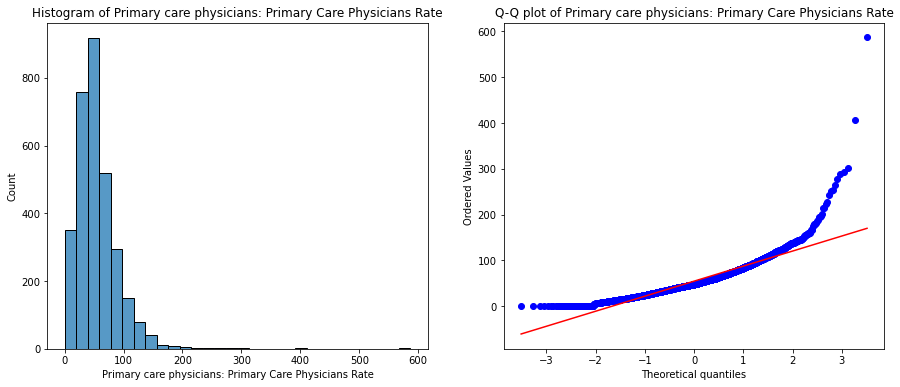

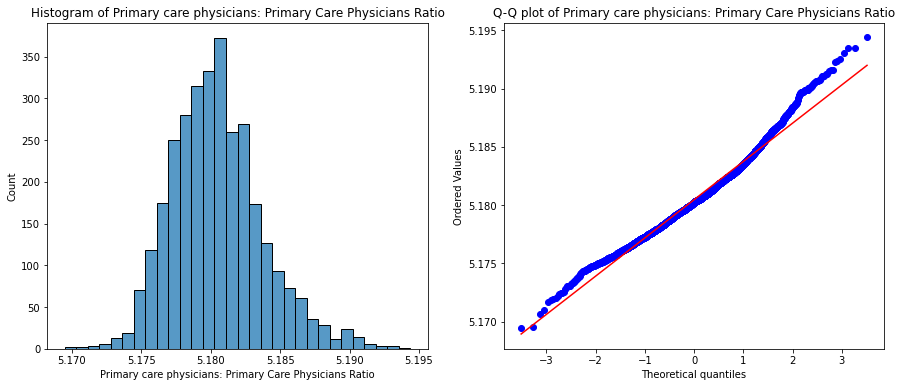

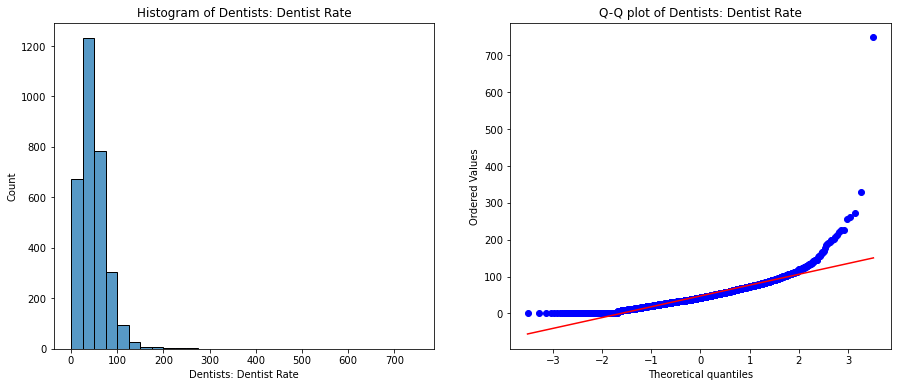

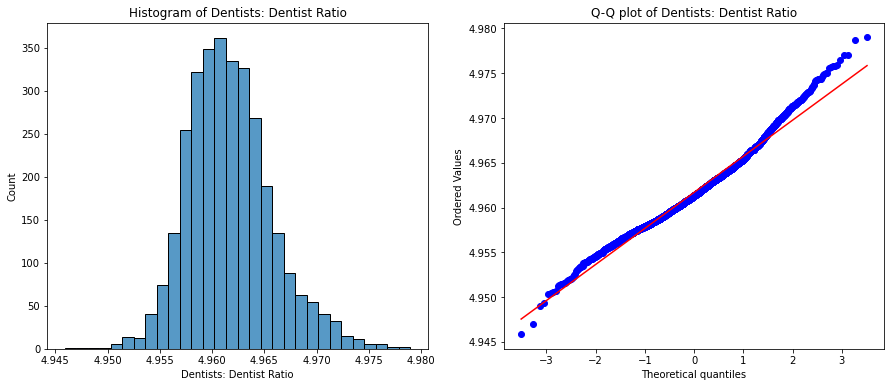

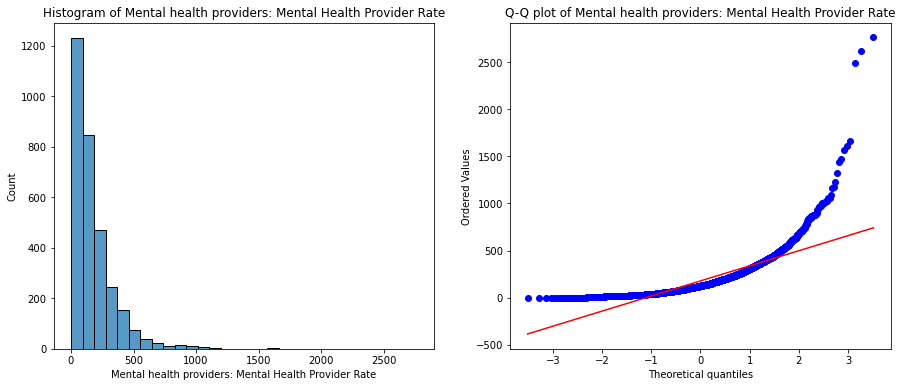

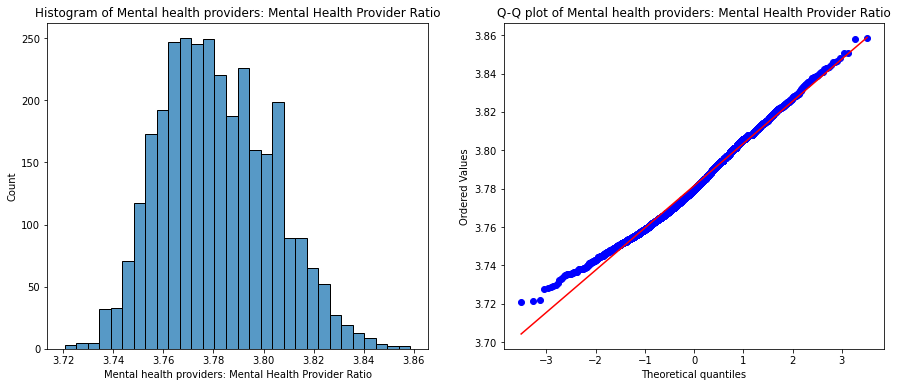

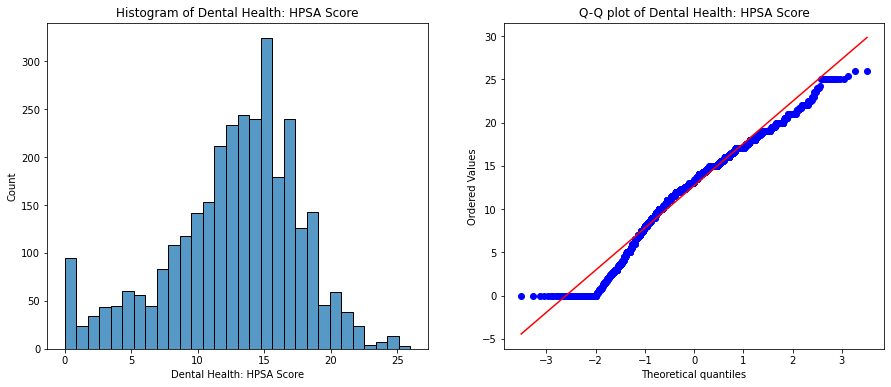

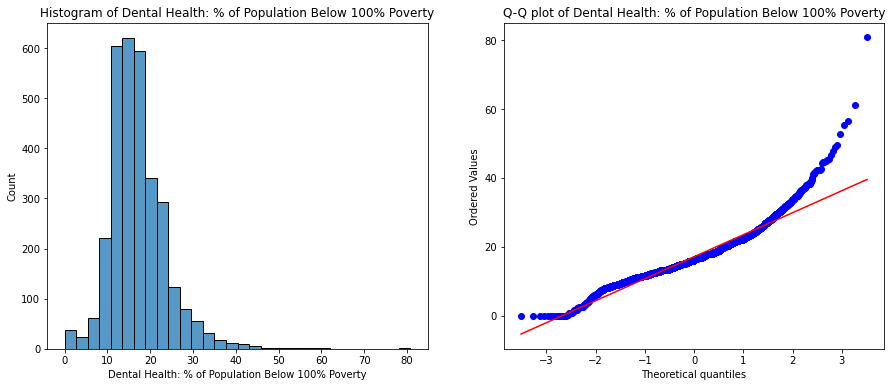

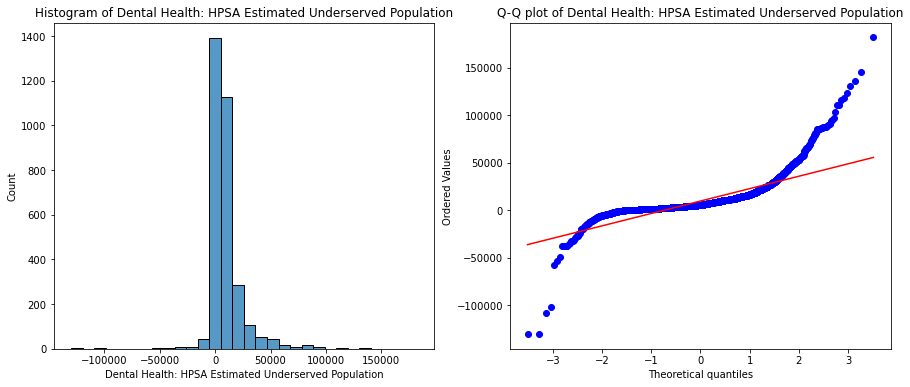

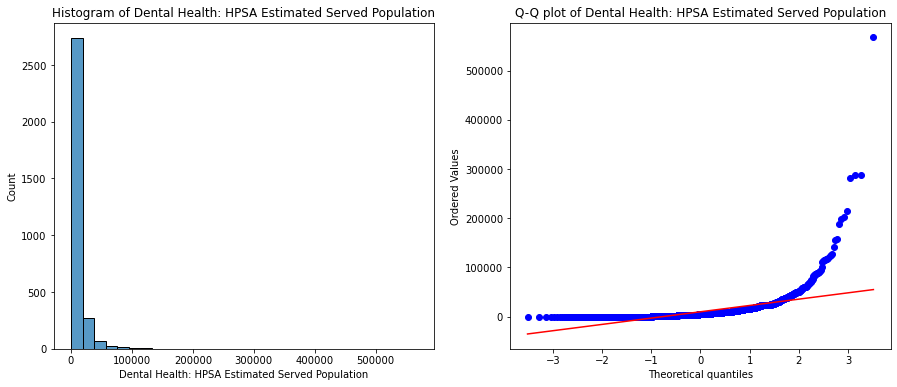

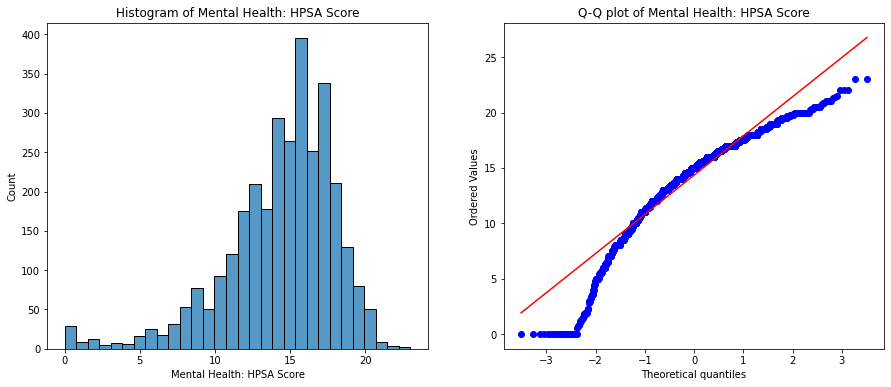

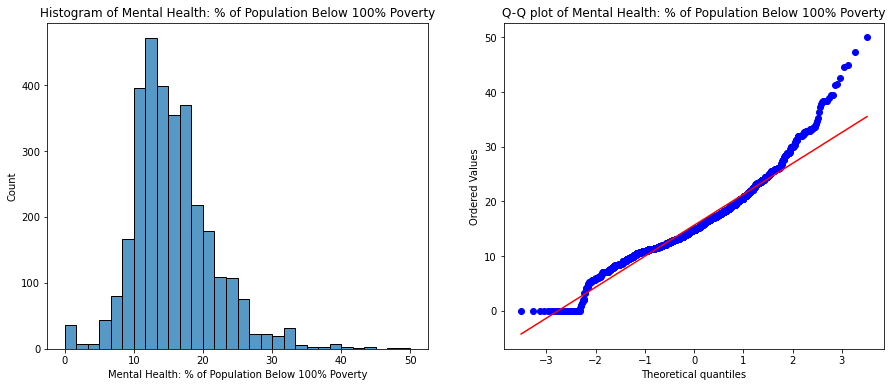

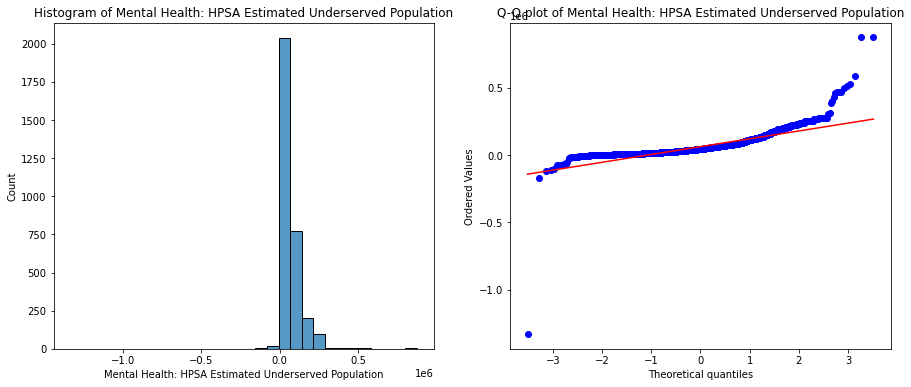

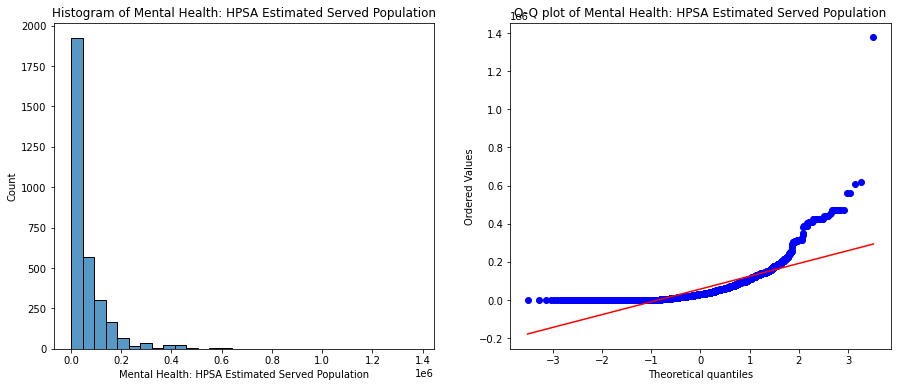

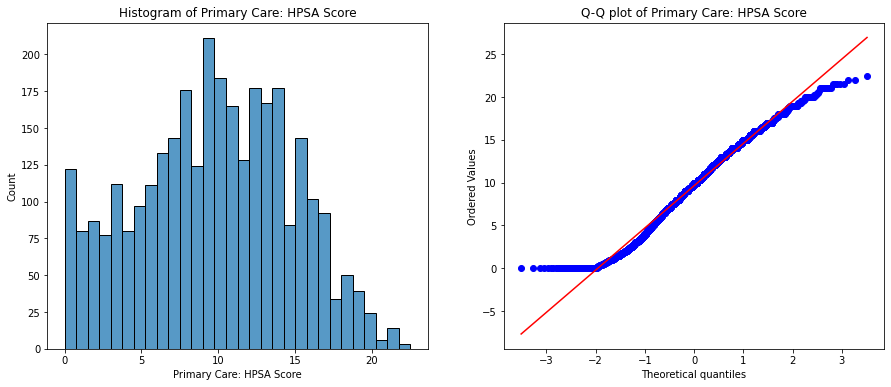

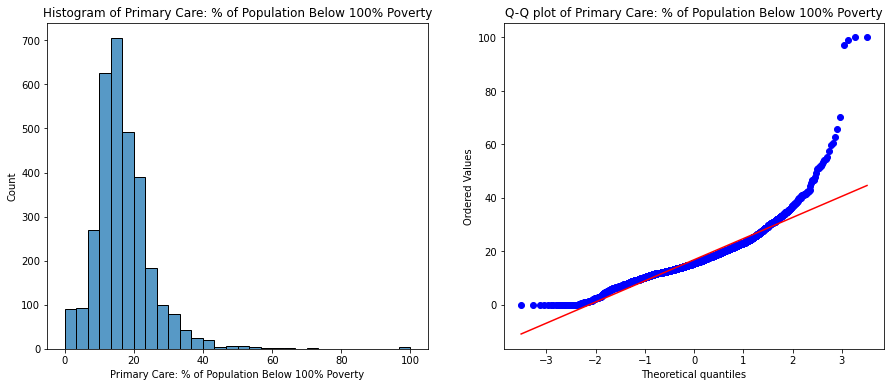

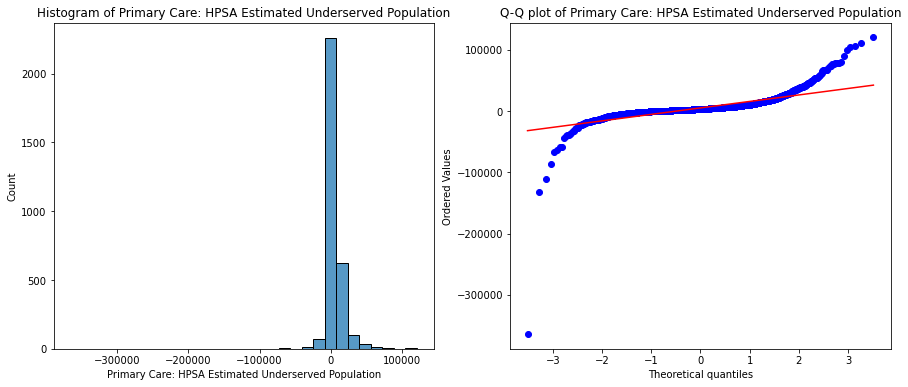

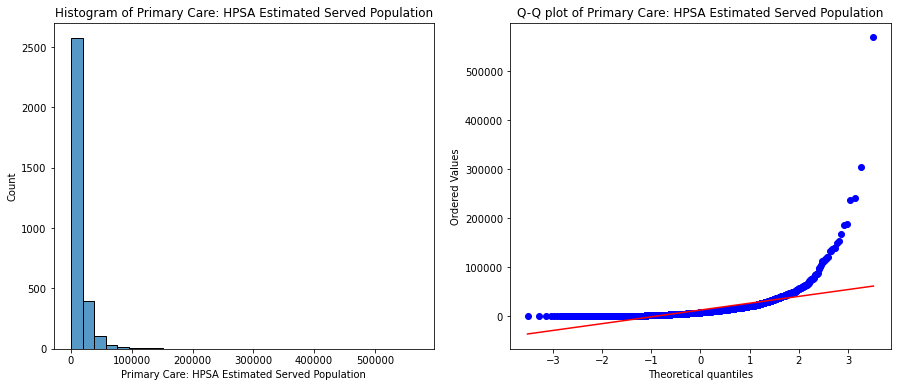

In [51]:
for column in subset1:
    diagnostic_plots(df_copy,column)

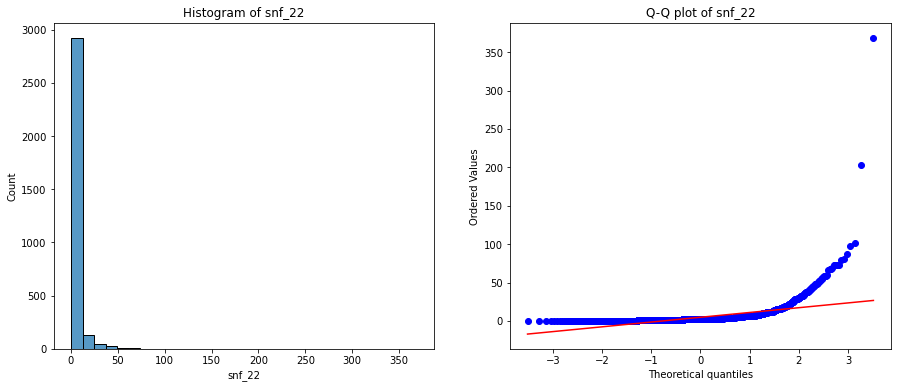

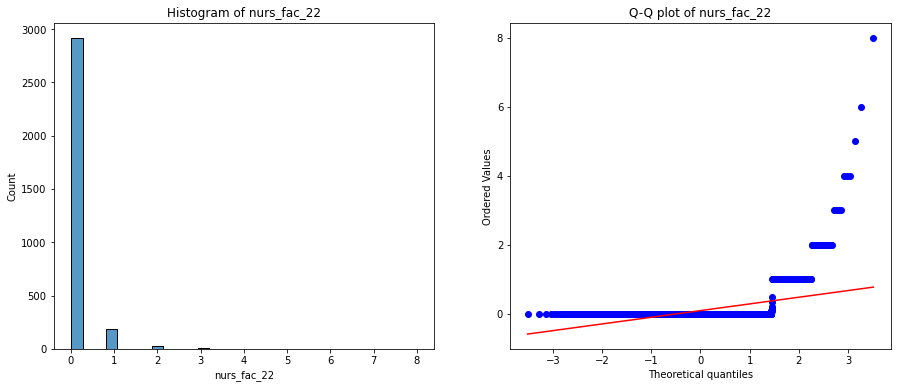

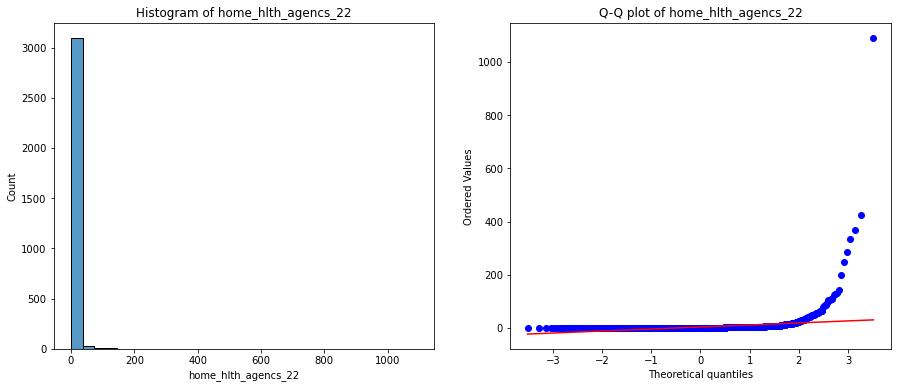

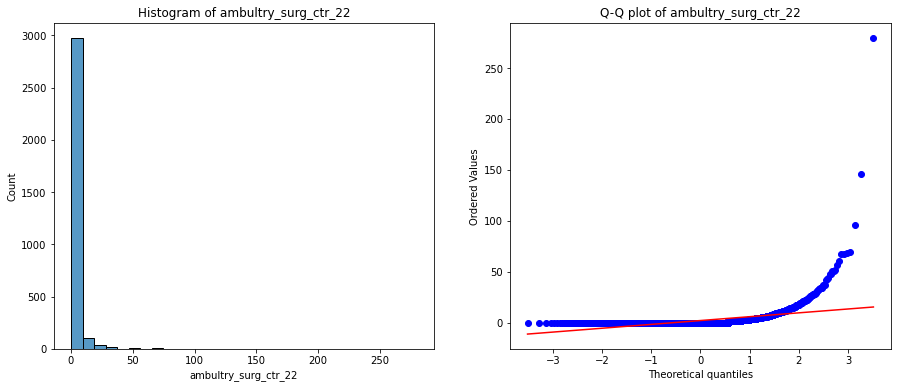

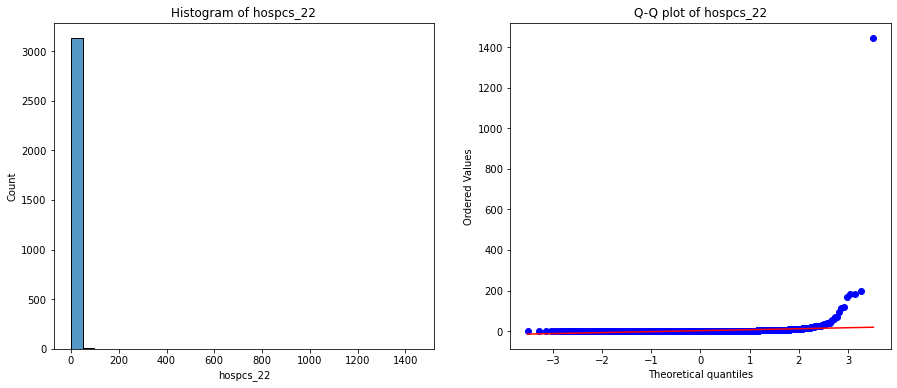

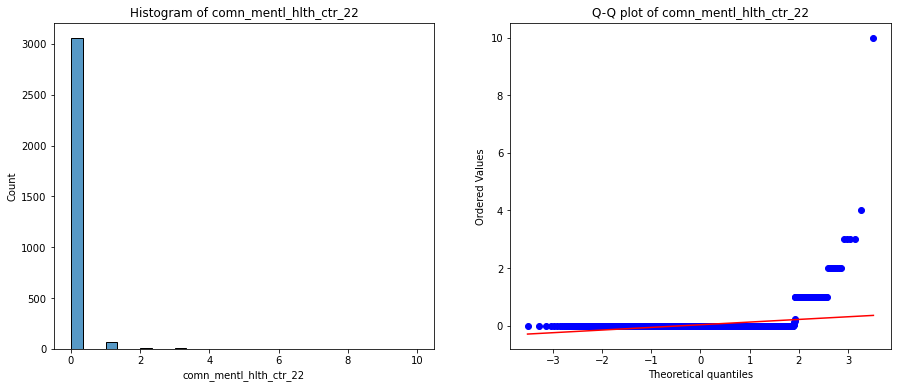

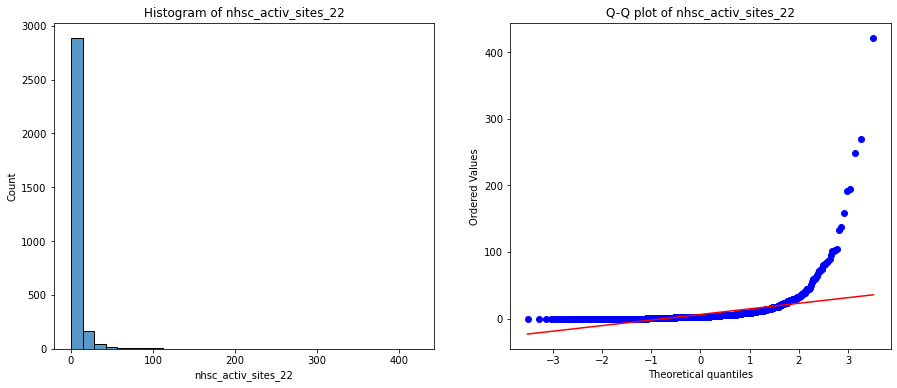

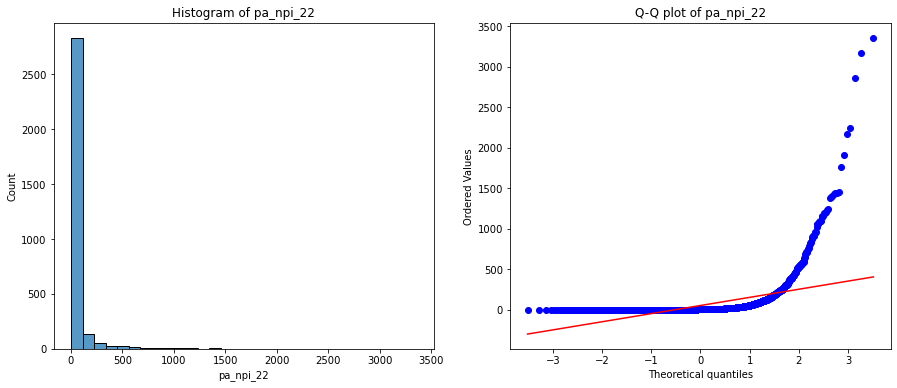

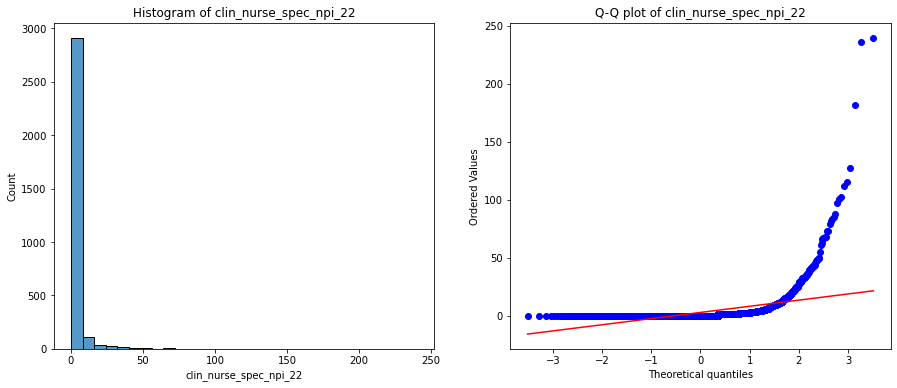

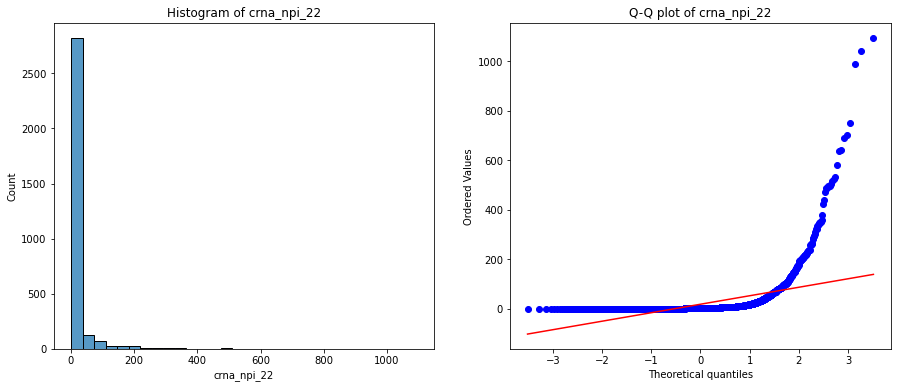

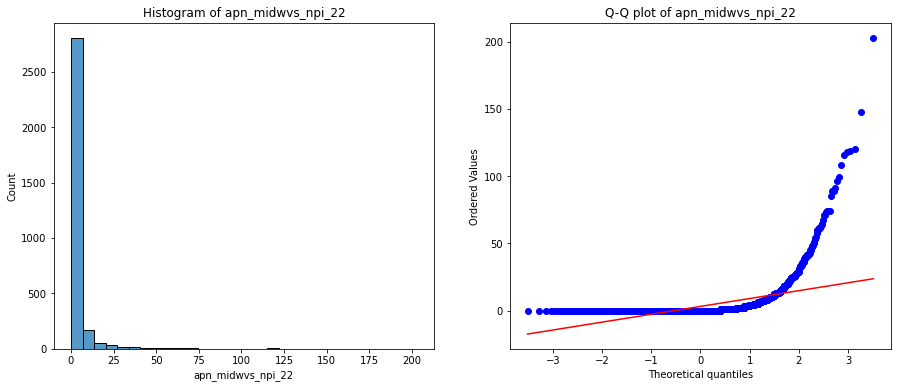

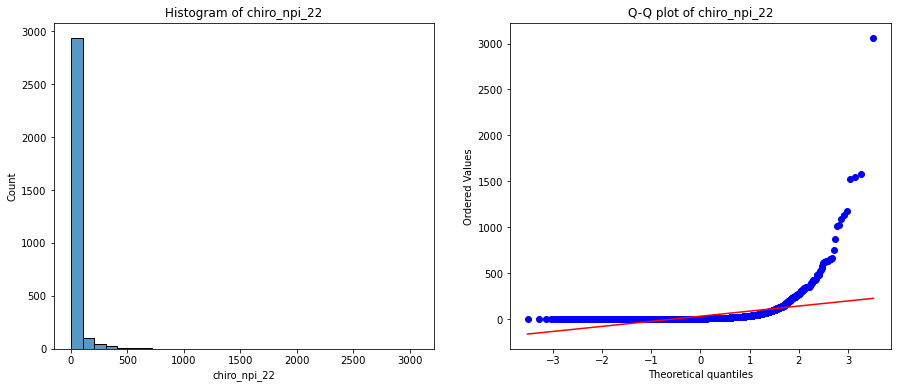

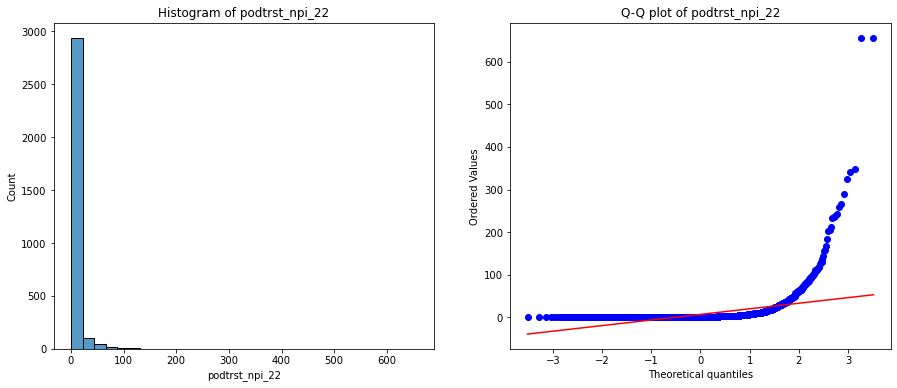

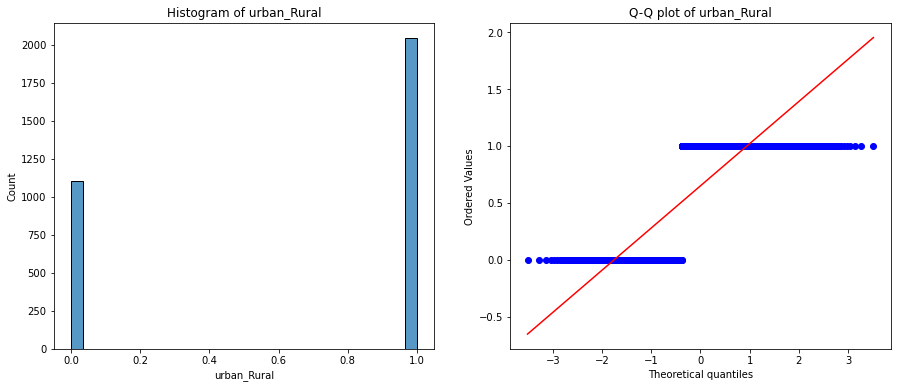

In [58]:
subset2 = ['snf_22',
 'nurs_fac_22',
 'home_hlth_agencs_22',
 'ambultry_surg_ctr_22',
 'hospcs_22',
 'comn_mentl_hlth_ctr_22',
 'nhsc_activ_sites_22',
 'pa_npi_22',
 'clin_nurse_spec_npi_22',
 'crna_npi_22',
 'apn_midwvs_npi_22',
 'chiro_npi_22',
 'podtrst_npi_22',
 'urban_Rural']
for column in subset2:
    diagnostic_plots(df_copy,column)

In [59]:
variables2 = ['pa_npi_22',
 'clin_nurse_spec_npi_22',
 'crna_npi_22',
 'apn_midwvs_npi_22',
 'chiro_npi_22',
 'podtrst_npi_22']
lct.fit(df_copy[variables2])
df_copy[variables2] = lct.transform(df_copy[variables2])
df_copy

LogCpTransformer()

fips             county    state  analysis_value  \
0      1001     Autauga County  ALABAMA             588   
1      1003     Baldwin County  ALABAMA             608   
2      1005     Barbour County  ALABAMA             747   
3      1007        Bibb County  ALABAMA             593   
4      1009      Blount County  ALABAMA             601   
...     ...                ...      ...             ...   
3137  56037  Sweetwater County  WYOMING             510   
3138  56039       Teton County  WYOMING             358   
3139  56041       Uinta County  WYOMING             538   
3140  56043    Washakie County  WYOMING             665   
3141  56045      Weston County  WYOMING             493   

      Primary care physicians: Primary Care Physicians Rate  \
0                                              44.74753       
1                                              68.98591       
2                                              36.45791       
3                                              58.05126       
4                                              22.48124       
...                                                 ...       
3137                                           44.87164       
3138                                          115.06989       
3139                                           44.49718       
3140                                           64.06150       
3141                                           43.30879       

      Primary care physicians: Primary Care Physicians Ratio  \
0                                              5.180577        
1                                              5.178352        
2                                              5.181654        
3                                              5.179229        
4                                              5.184240        
...                                                 ...        
3137                                           5.180563        
3138                                           5.175845        
3139                                           5.180605        
3140                                           5.178725        
3141                                           5.180747        

      Dentists: Dentist Rate  Dentists: Dentist Ratio  \
0                   33.84095                 4.963096   
1                   48.84708                 4.960660   
2                   36.60173                 4.962572   
3                   27.10517                 4.964585   
4                   19.00517                 4.966987   
...                      ...                      ...   
3137                58.58505                 4.959473   
3138                93.62897                 4.956479   
3139                84.09597                 4.957153   
3140                90.20619                 4.956715   
3141                74.15097                 4.957955   

      Mental health providers: Mental Health Provider Rate  \
0                                              37.40315      
1                                              99.43869      
2                                              24.40115      
3                                              27.10517      
4                                              17.27742      
...                                                 ...      
3137                                          246.05723      
3138                                          544.75039      
3139                                          366.06480      
3140                                          399.48454      
3141                                          177.96233      

      Mental health providers: Mental Health Provider Ratio  \
0                                              3.804551       
1                                              3.783049       
2                                              3.813908       
3                                              3.811608       
4                          

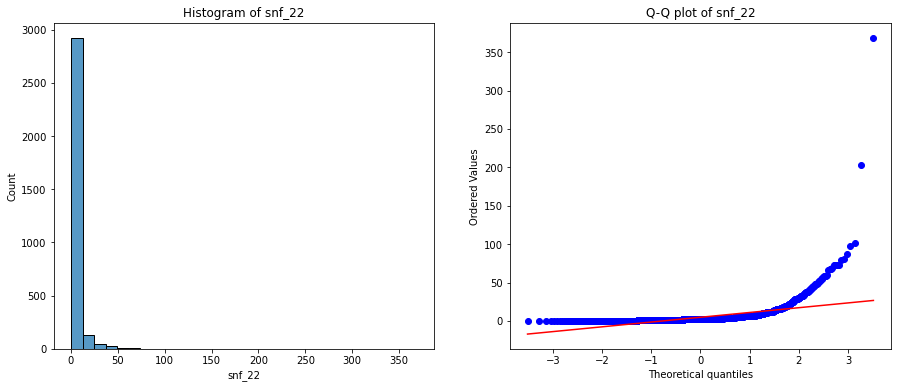

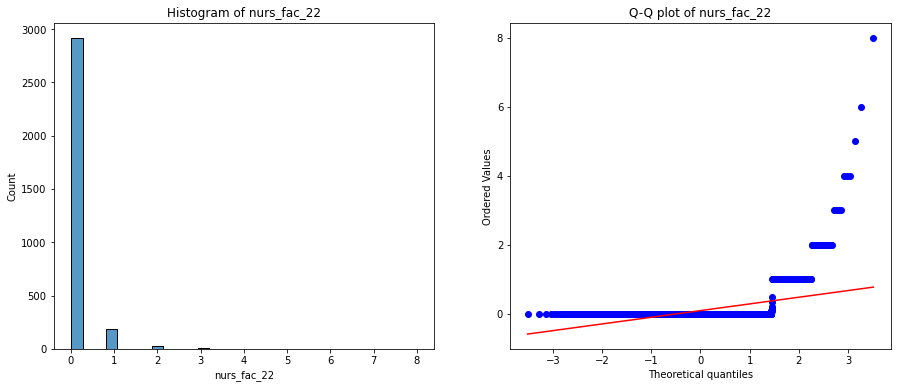

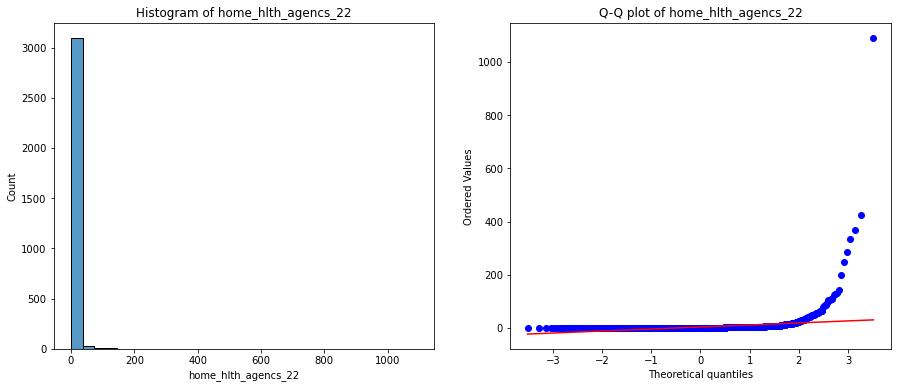

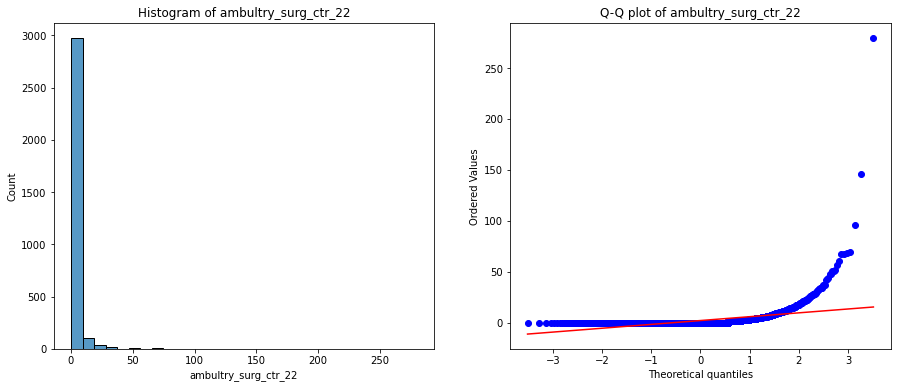

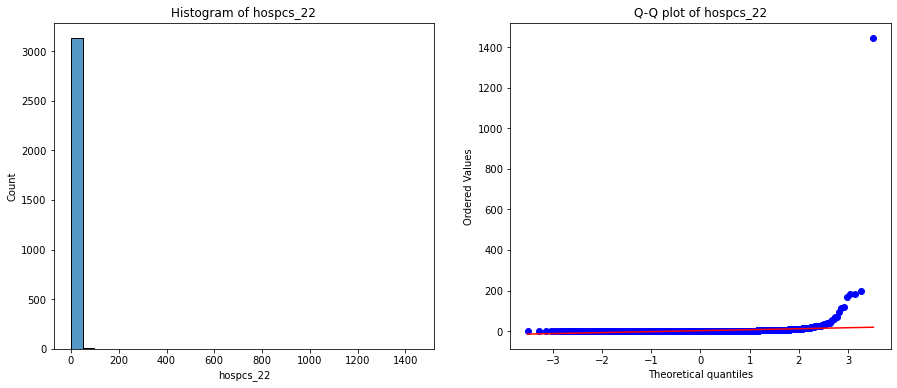

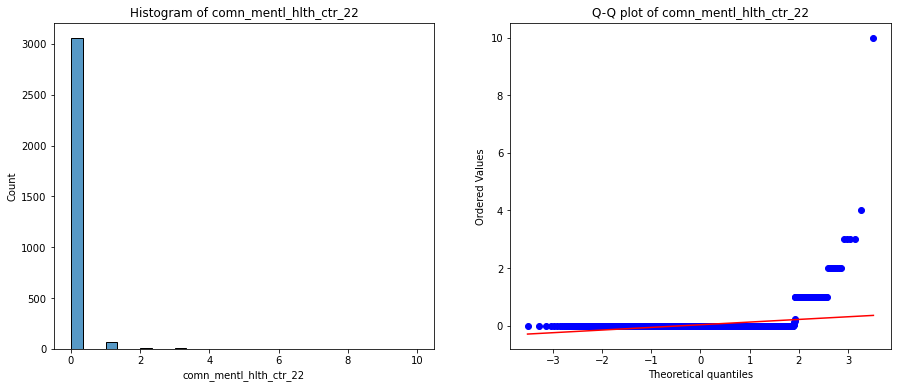

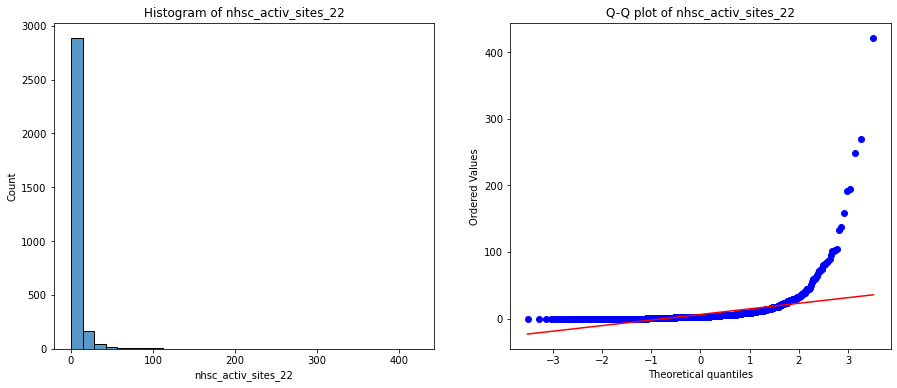

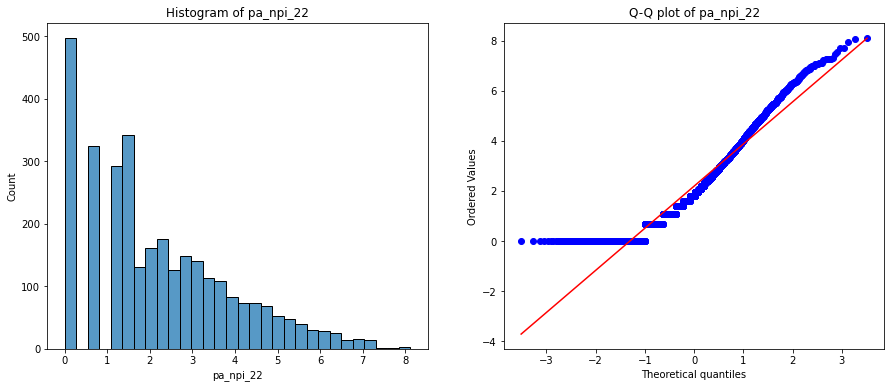

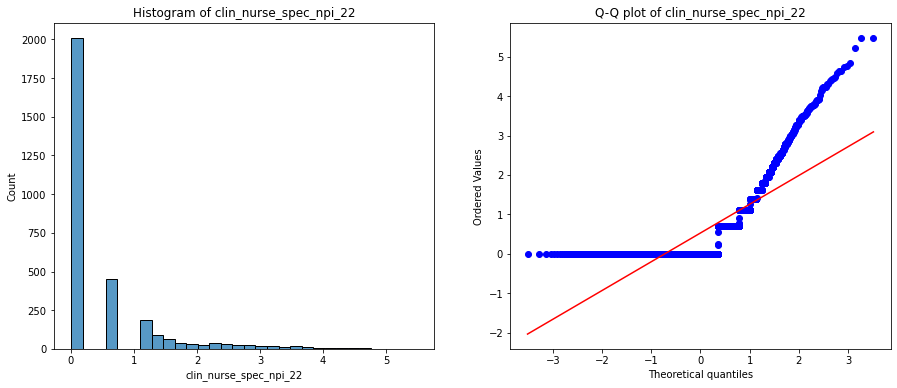

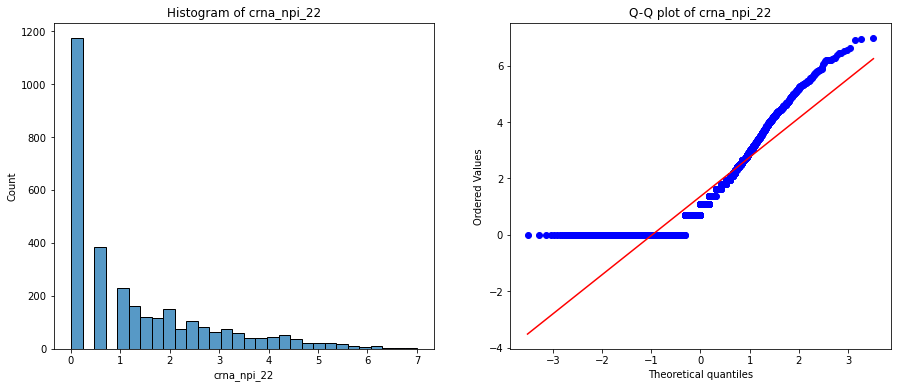

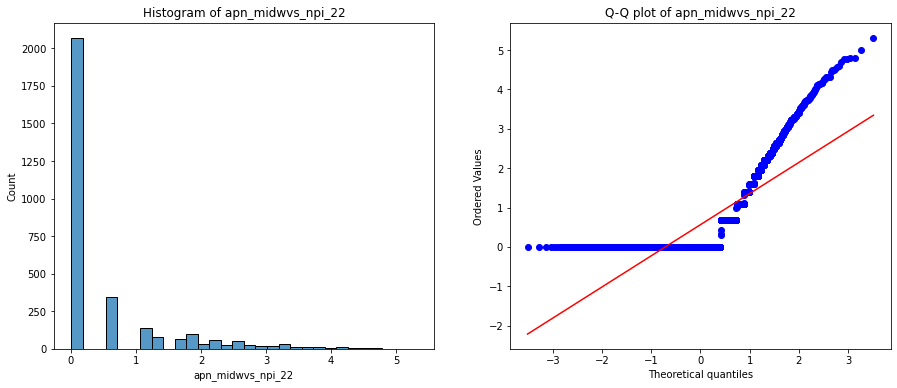

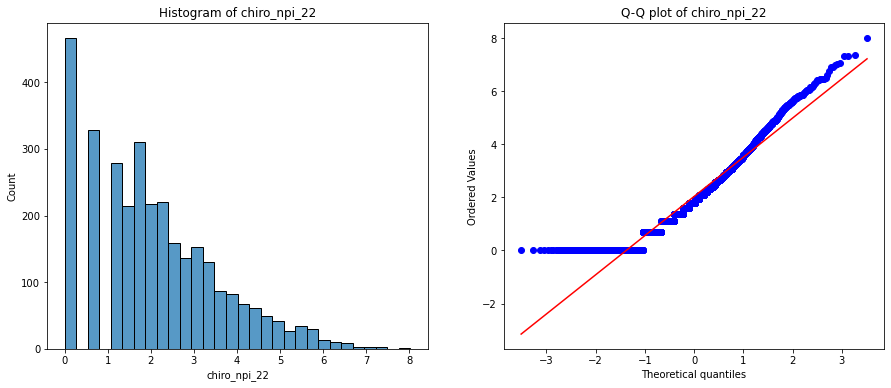

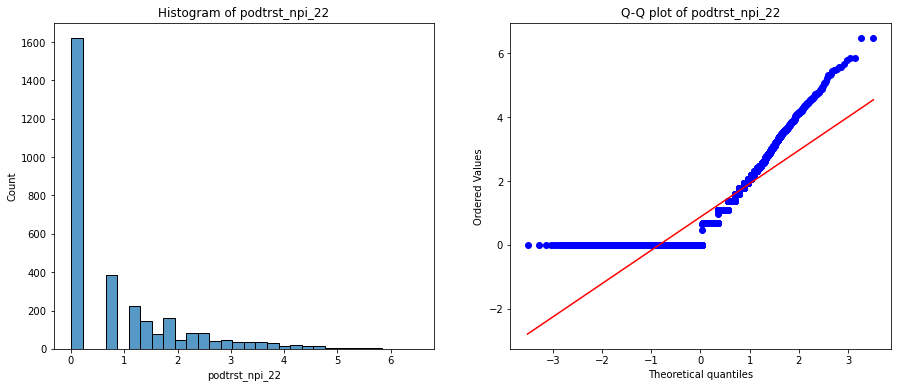

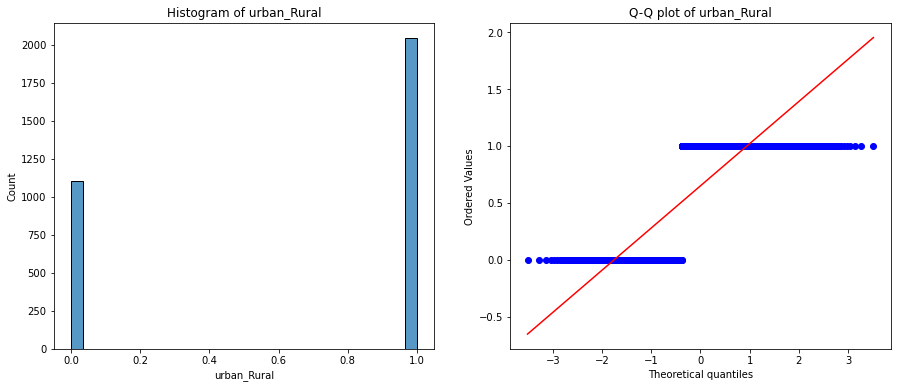

In [60]:
for column in subset2:
    diagnostic_plots(df_copy,column)

In [68]:
df_copy['Dental Health Served Ratio'] = df_copy['Dental Health: HPSA Estimated Served Population']/df_copy['Dental Health: HPSA Estimated Underserved Population']
df_copy['Mental Health Served Ratio'] = df_copy['Mental Health: HPSA Estimated Served Population']/df_copy['Mental Health: HPSA Estimated Underserved Population']
df_copy['Primary Care Served Ratio'] = df_copy['Primary Care: HPSA Estimated Served Population']/df_copy['Primary Care: HPSA Estimated Underserved Population']

df_copy.drop(columns = ['Dental Health: HPSA Estimated Underserved Population',
                     'Dental Health: HPSA Estimated Served Population',
                     'Mental Health: HPSA Estimated Underserved Population',
                     'Mental Health: HPSA Estimated Served Population',
                     'Primary Care: HPSA Estimated Underserved Population',
                     'Primary Care: HPSA Estimated Served Population'],inplace=True)
df_copy

fips             county    state  analysis_value  \
0      1001     Autauga County  ALABAMA             588   
1      1003     Baldwin County  ALABAMA             608   
2      1005     Barbour County  ALABAMA             747   
3      1007        Bibb County  ALABAMA             593   
4      1009      Blount County  ALABAMA             601   
...     ...                ...      ...             ...   
3137  56037  Sweetwater County  WYOMING             510   
3138  56039       Teton County  WYOMING             358   
3139  56041       Uinta County  WYOMING             538   
3140  56043    Washakie County  WYOMING             665   
3141  56045      Weston County  WYOMING             493   

      Primary care physicians: Primary Care Physicians Rate  \
0                                              44.74753       
1                                              68.98591       
2                                              36.45791       
3                                              58.05126       
4                                              22.48124       
...                                                 ...       
3137                                           44.87164       
3138                                          115.06989       
3139                                           44.49718       
3140                                           64.06150       
3141                                           43.30879       

      Primary care physicians: Primary Care Physicians Ratio  \
0                                              5.180577        
1                                              5.178352        
2                                              5.181654        
3                                              5.179229        
4                                              5.184240        
...                                                 ...        
3137                                           5.180563        
3138                                           5.175845        
3139                                           5.180605        
3140                                           5.178725        
3141                                           5.180747        

      Dentists: Dentist Rate  Dentists: Dentist Ratio  \
0                   33.84095                 4.963096   
1                   48.84708                 4.960660   
2                   36.60173                 4.962572   
3                   27.10517                 4.964585   
4                   19.00517                 4.966987   
...                      ...                      ...   
3137                58.58505                 4.959473   
3138                93.62897                 4.956479   
3139                84.09597                 4.957153   
3140                90.20619                 4.956715   
3141                74.15097                 4.957955   

      Mental health providers: Mental Health Provider Rate  \
0                                              37.40315      
1                                              99.43869      
2                                              24.40115      
3                                              27.10517      
4                                              17.27742      
...                                                 ...      
3137                                          246.05723      
3138                                          544.75039      
3139                                          366.06480      
3140                                          399.48454      
3141                                          177.96233      

      Mental health providers: Mental Health Provider Ratio  \
0                                              3.804551       
1                                              3.783049       
2                                              3.813908       
3                                              3.811608       
4                          

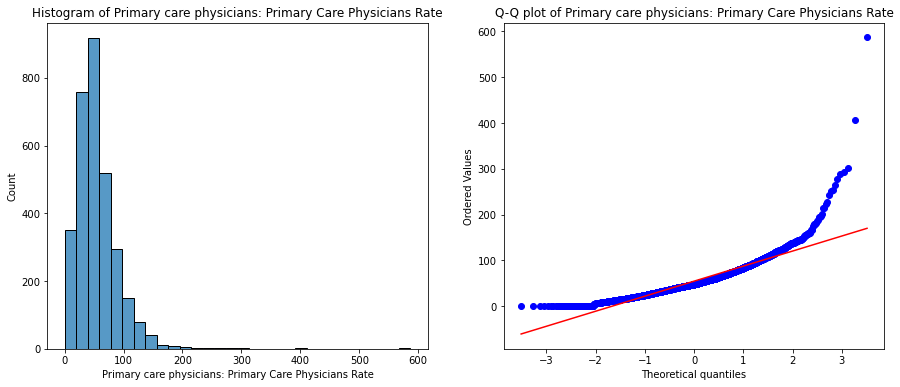

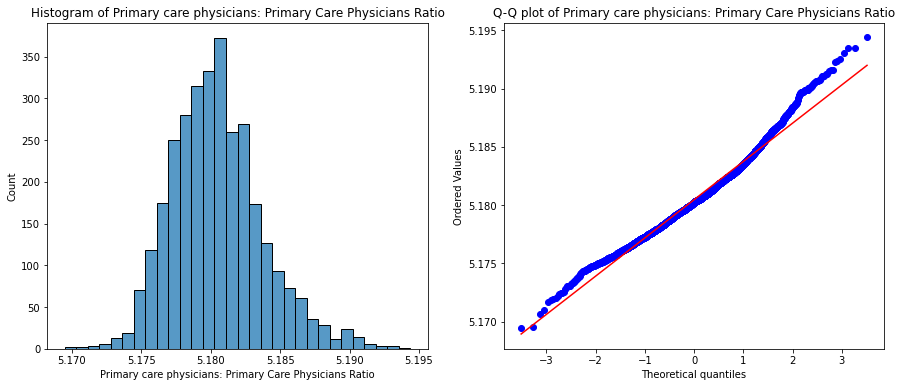

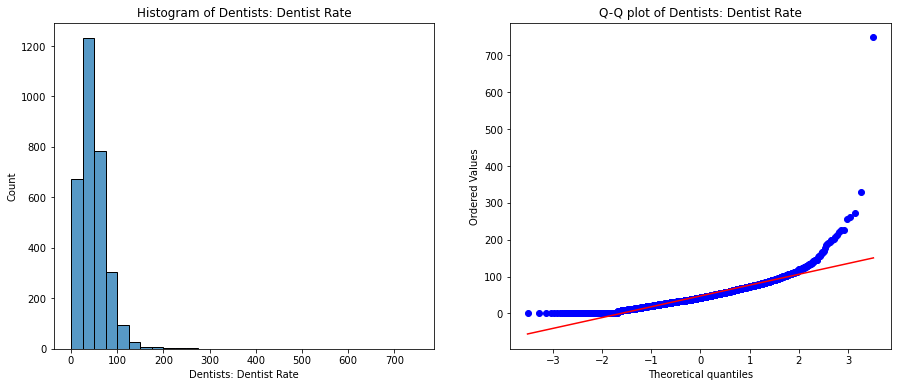

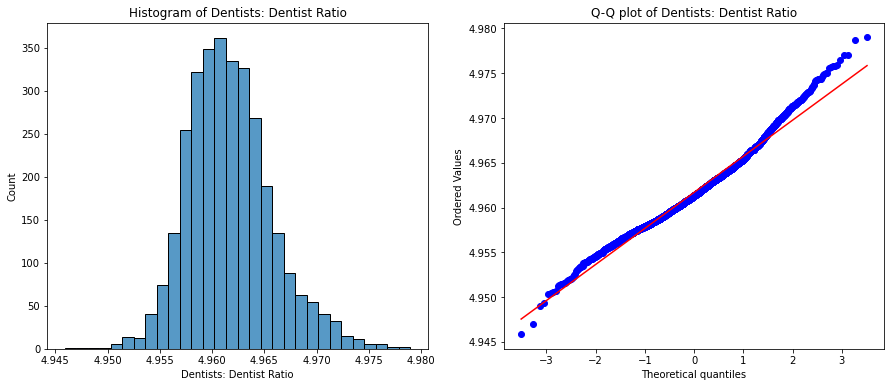

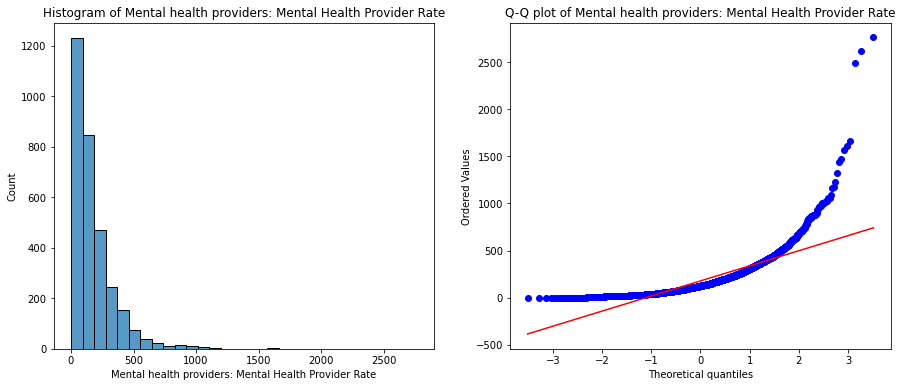

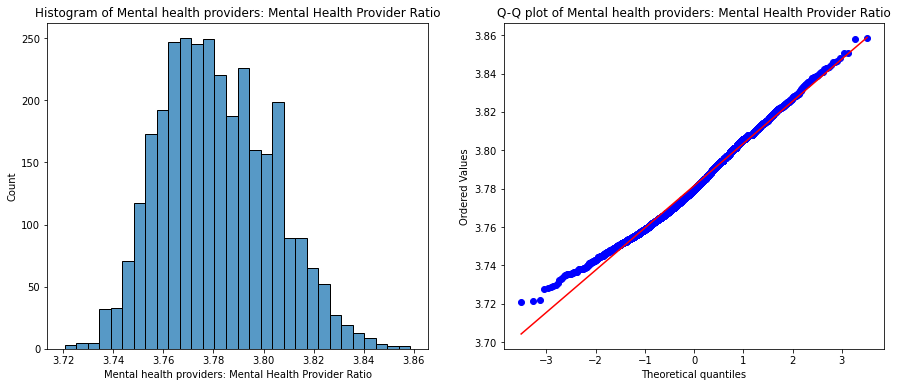

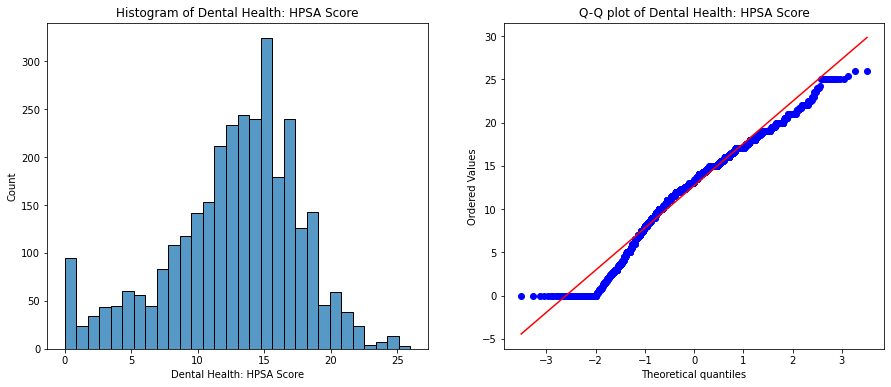

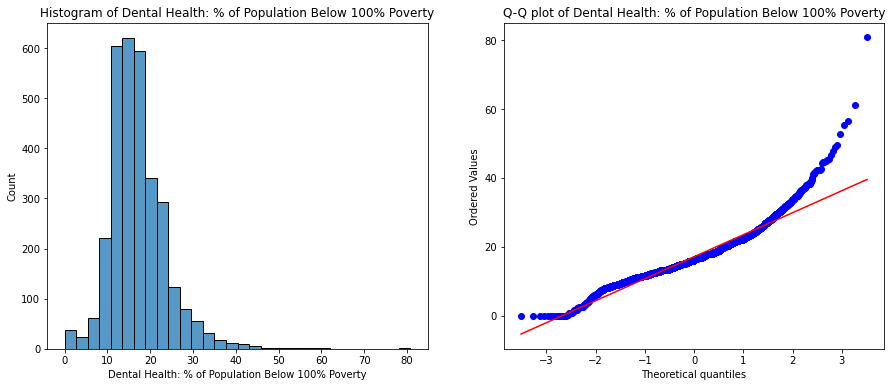

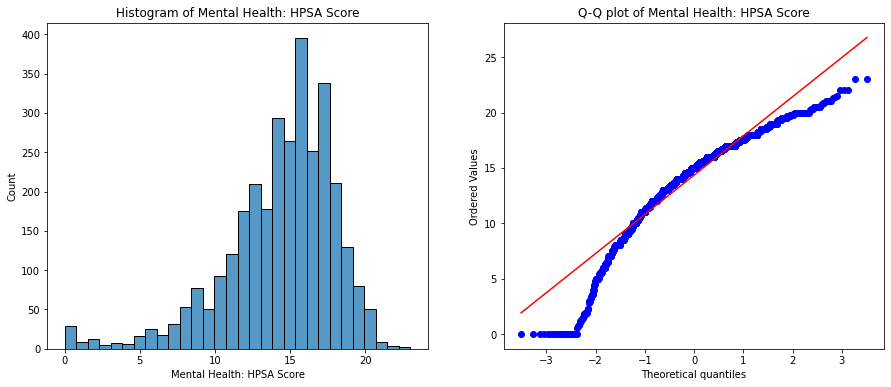

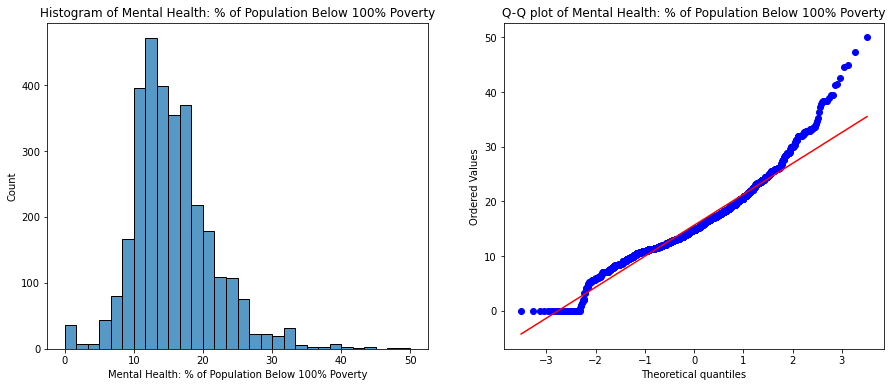

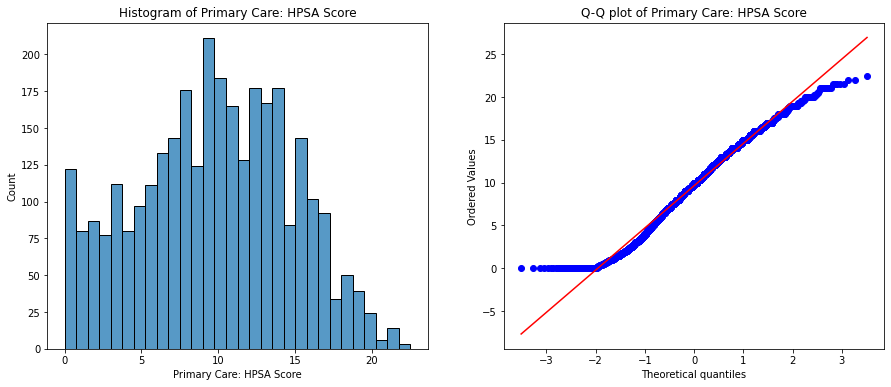

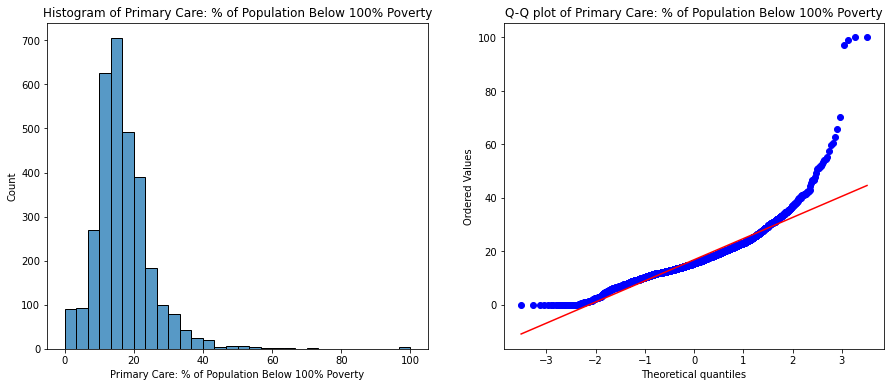

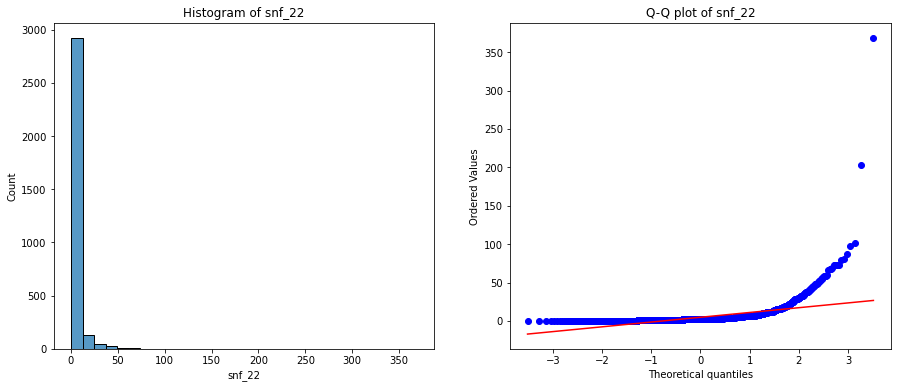

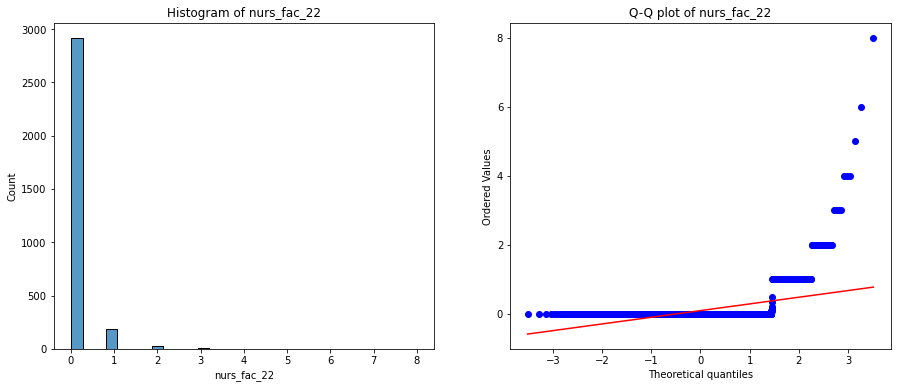

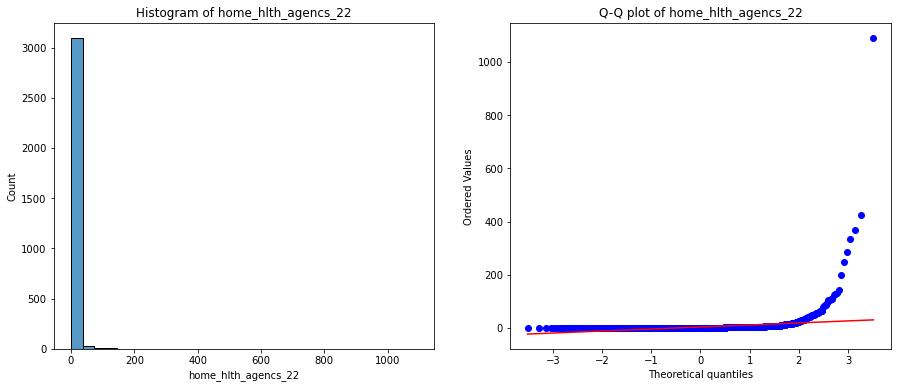

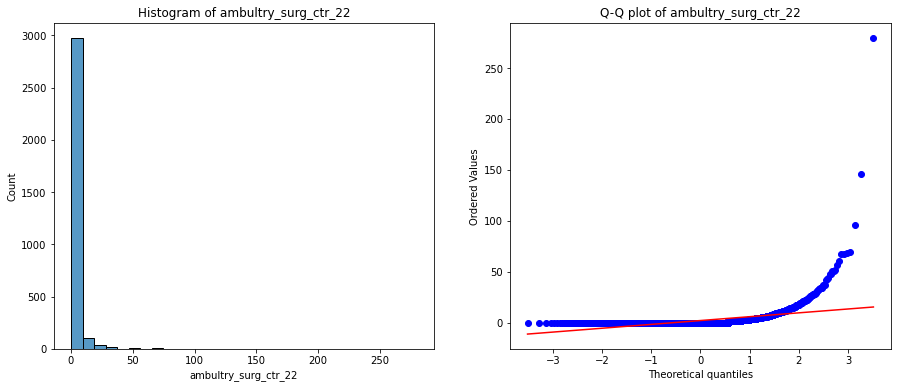

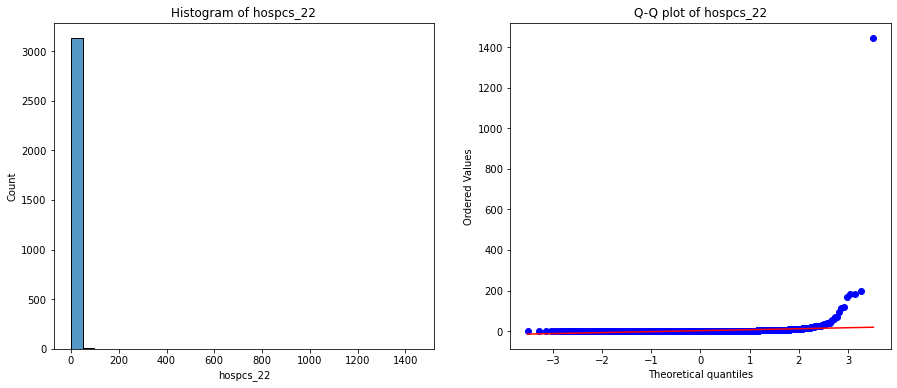

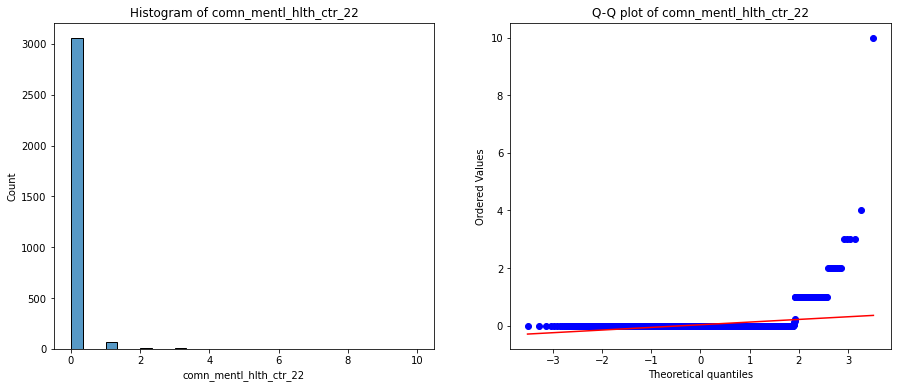

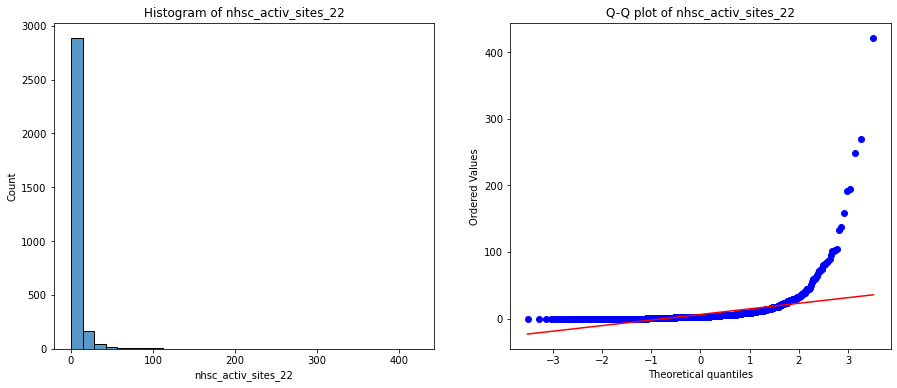

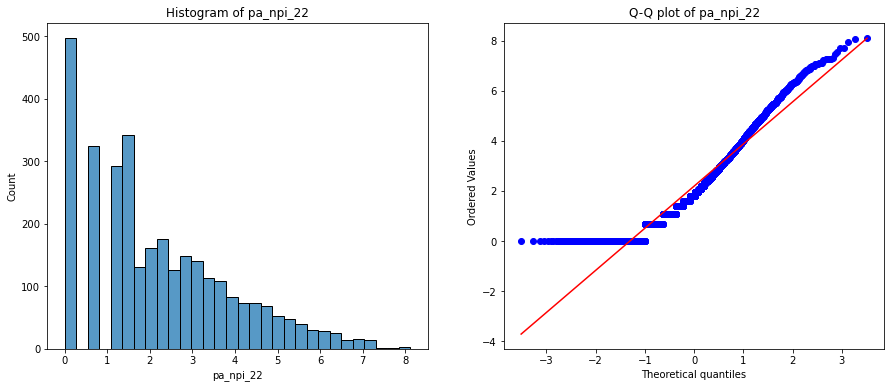

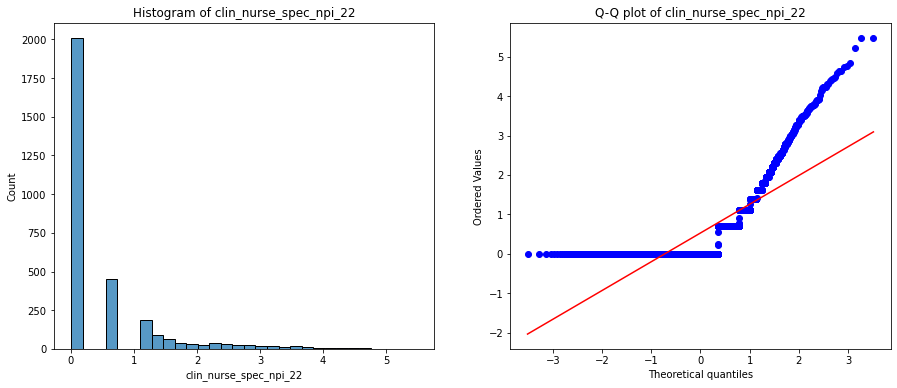

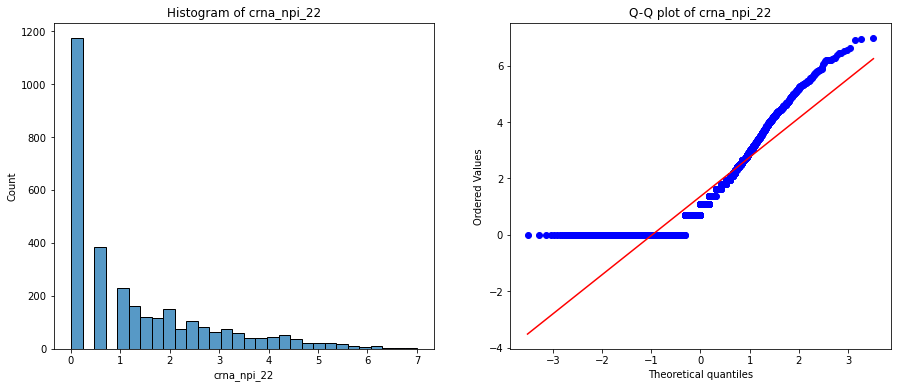

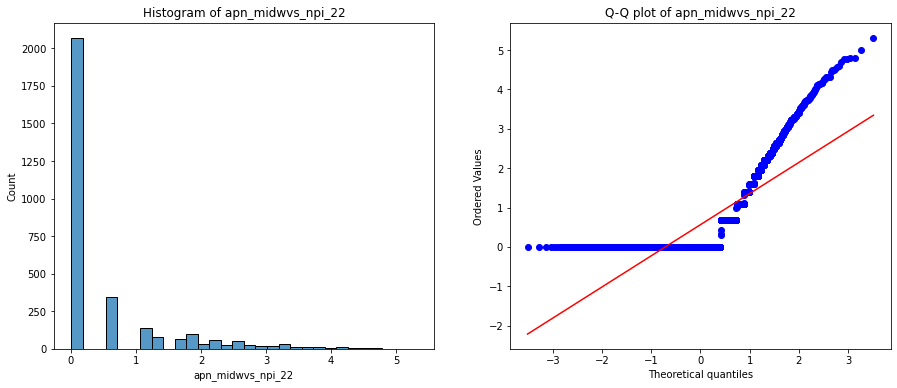

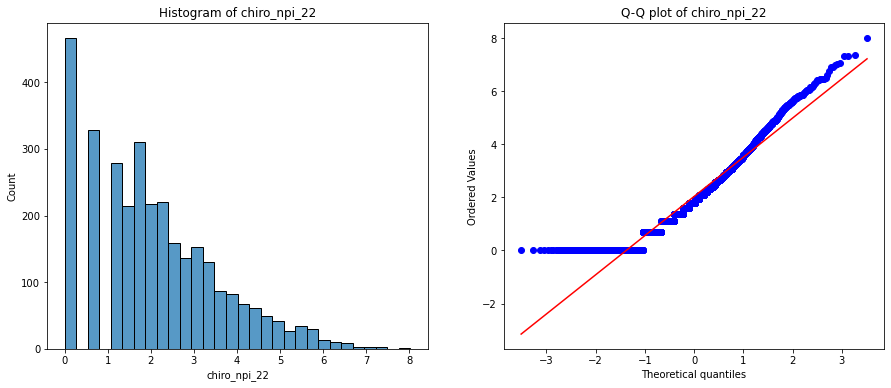

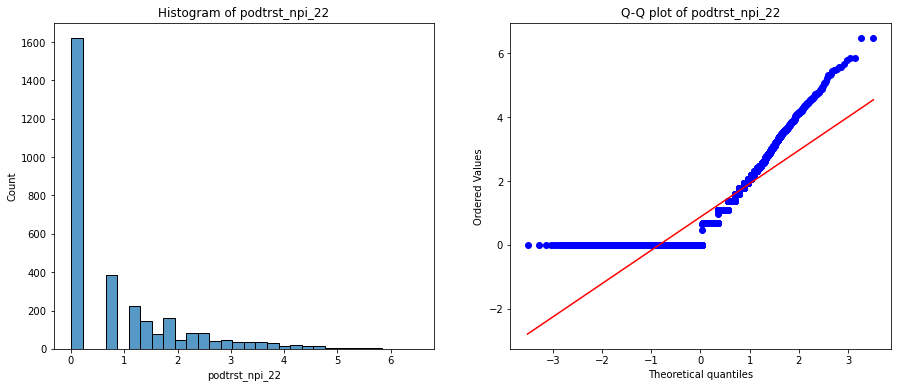

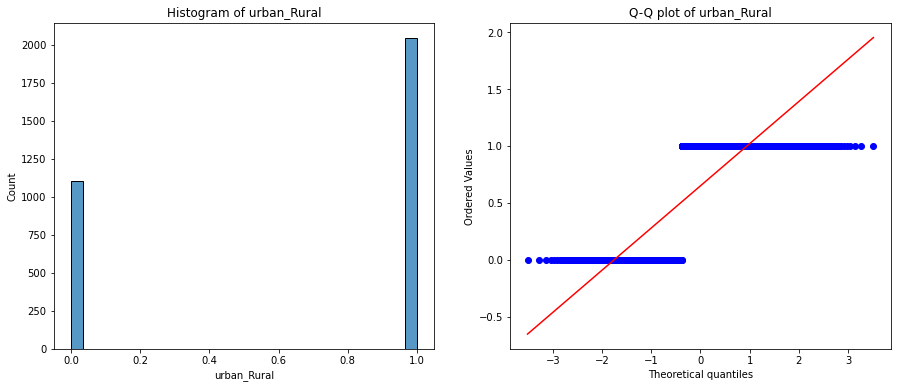

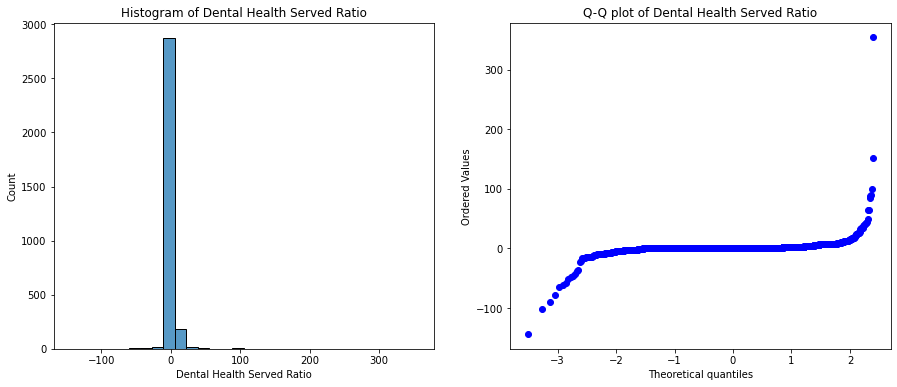

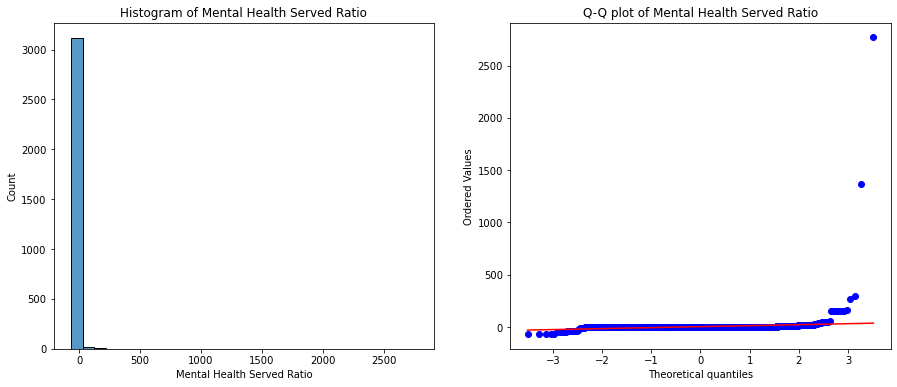

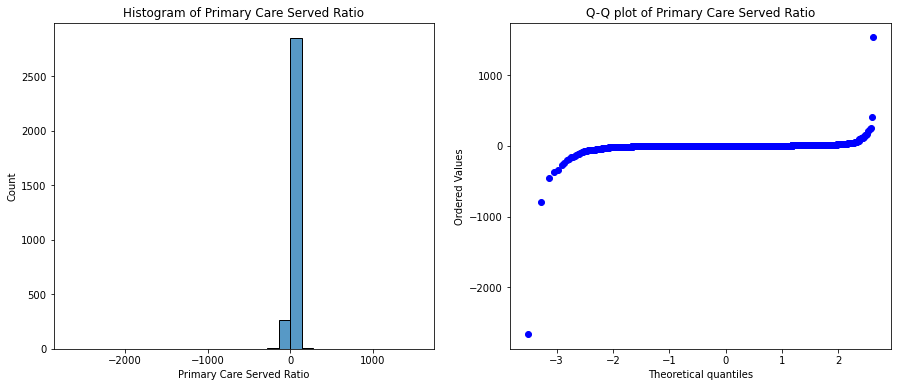

In [69]:
col_list = [column for column in df_copy.select_dtypes(include = np.number).columns if column not in ['fips','analysis_value']]
for column in col_list:
    diagnostic_plots(df_copy,column)

## Winsorize Data (saving for later)

In [62]:
from scipy.stats.mstats import winsorize

df_win = pd.DataFrame(df_copy[['fips','analysis_value']])
for column in df_copy.loc[:, [column for column in df_copy.select_dtypes(include = np.number).columns if column not in ['fips','analysis_value']]]:
    df_win[column] = winsorize(df_copy[column], limits = [0.05, 0.05])
df_win

fips  analysis_value  \
0      1001             588   
1      1003             608   
2      1005             747   
3      1007             593   
4      1009             601   
...     ...             ...   
3137  56037             510   
3138  56039             358   
3139  56041             538   
3140  56043             665   
3141  56045             493   

      Primary care physicians: Primary Care Physicians Rate  \
0                                              44.74753       
1                                              68.98591       
2                                              36.45791       
3                                              58.05126       
4                                              22.48124       
...                                                 ...       
3137                                           44.87164       
3138                                          115.06989       
3139                                           44.49718       
3140                                           64.06150       
3141                                           43.30879       

      Primary care physicians: Primary Care Physicians Ratio  \
0                                              5.180577        
1                                              5.178352        
2                                              5.181654        
3                                              5.179229        
4                                              5.184240        
...                                                 ...        
3137                                           5.180563        
3138                                           5.175845        
3139                                           5.180605        
3140                                           5.178725        
3141                                           5.180747        

      Dentists: Dentist Rate  Dentists: Dentist Ratio  \
0                   33.84095                 4.963096   
1                   48.84708                 4.960660   
2                   36.60173                 4.962572   
3                   27.10517                 4.964585   
4                   19.00517                 4.966987   
...                      ...                      ...   
3137                58.58505                 4.959473   
3138                93.62897                 4.956479   
3139                84.09597                 4.957153   
3140                90.20619                 4.956715   
3141                74.15097                 4.957955   

      Mental health providers: Mental Health Provider Rate  \
0                                              37.40315      
1                                              99.43869      
2                                              24.40115      
3                                              27.10517      
4                                              17.27742      
...                                                 ...      
3137                                          246.05723      
3138                                          504.06527      
3139                                          366.06480      
3140                                          399.48454      
3141                                          177.96233      

      Mental health providers: Mental Health Provider Ratio  \
0                                              3.804551       
1                                              3.783049       
2                                              3.813908       
3                                              3.811608       
4                                              3.819751       
...                                                 ...       
3137                                           3.763374       
3138                                           3.748553       
3139                                           3.755055       
3140                                           3

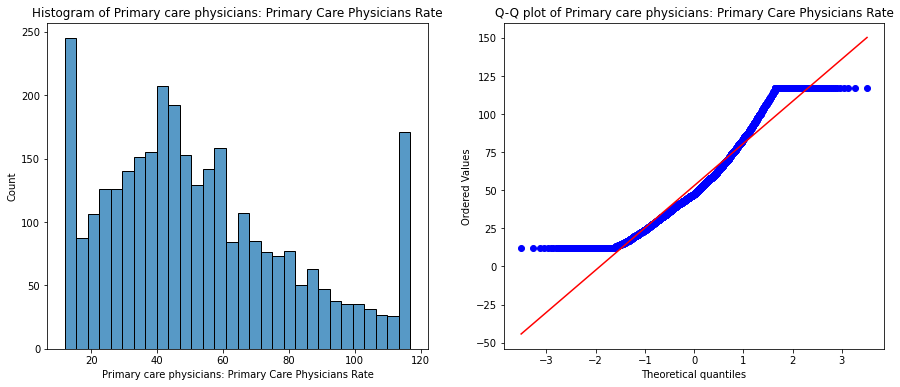

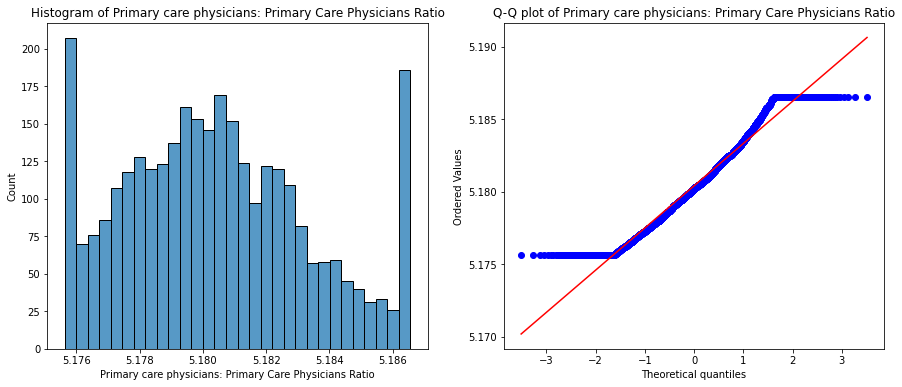

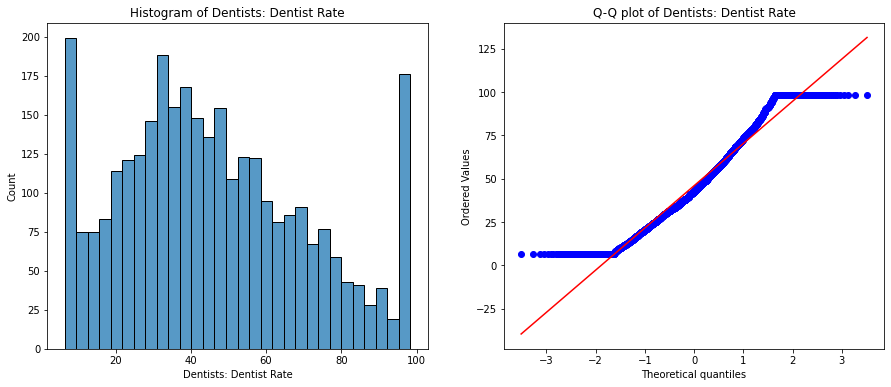

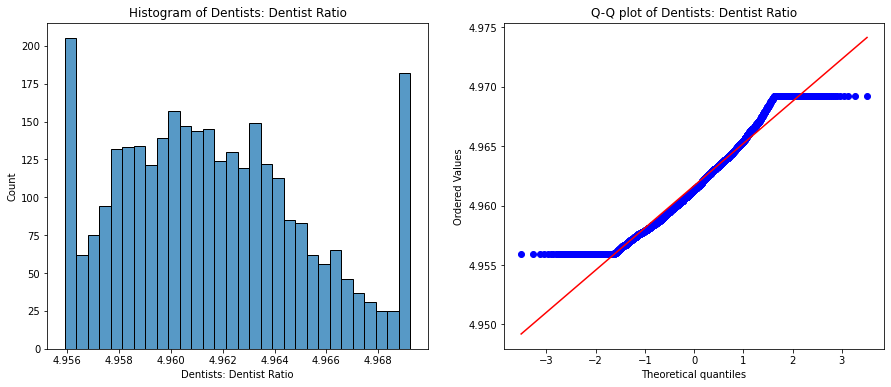

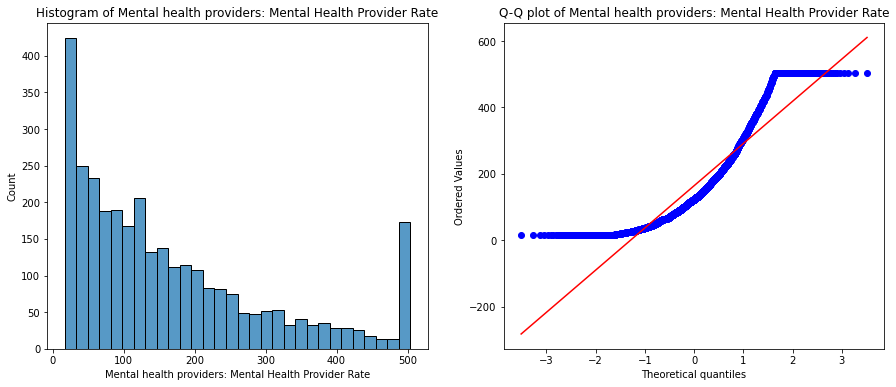

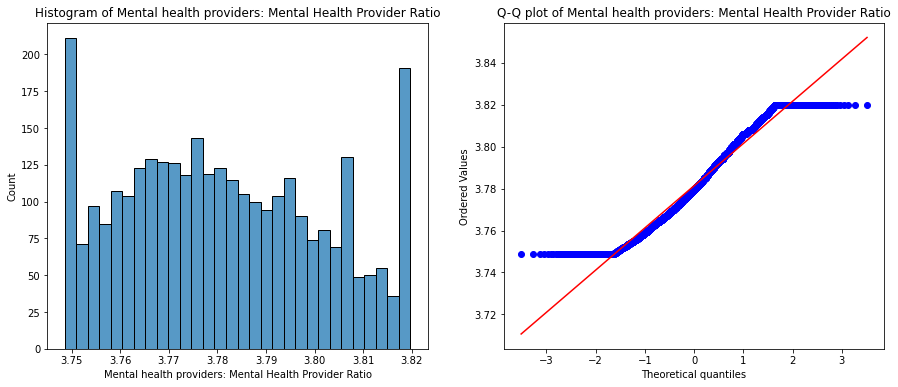

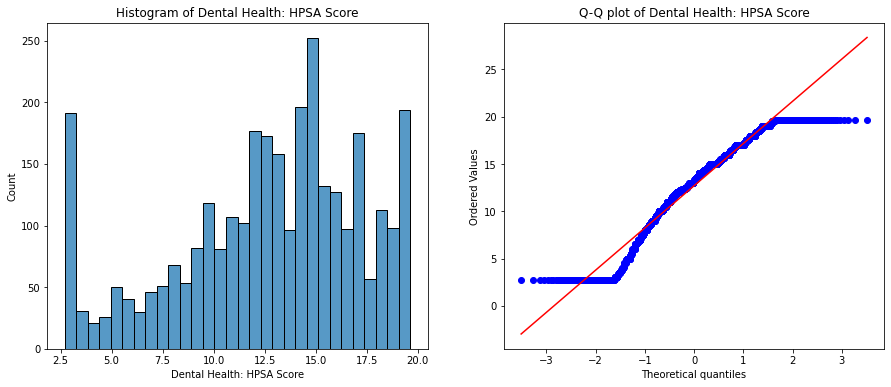

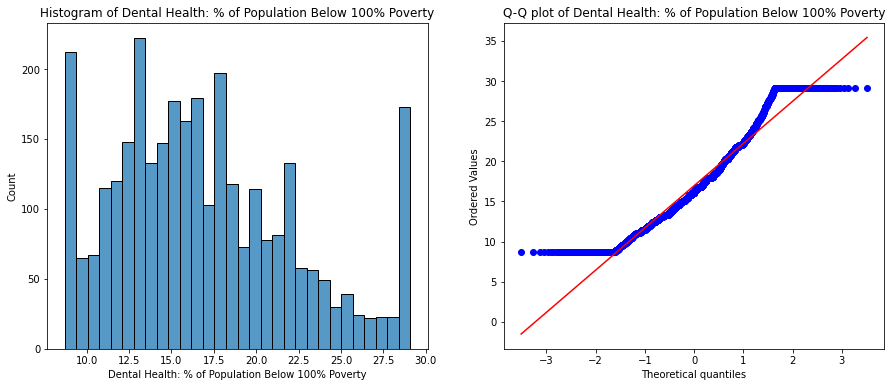

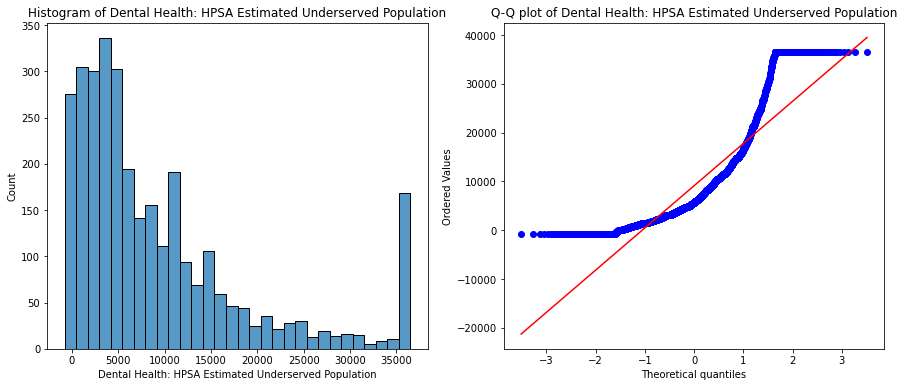

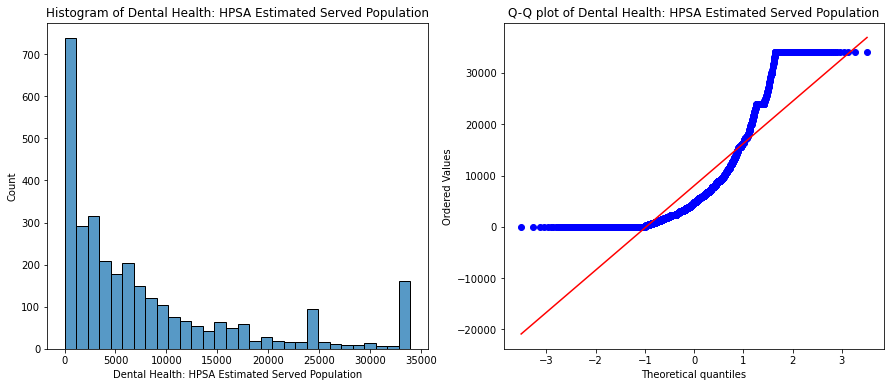

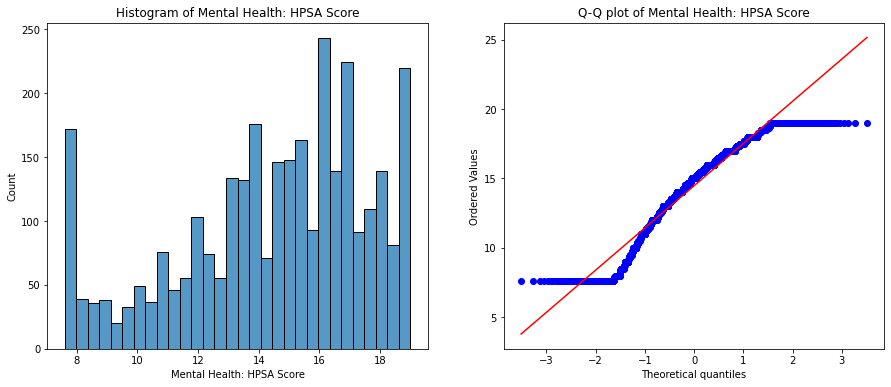

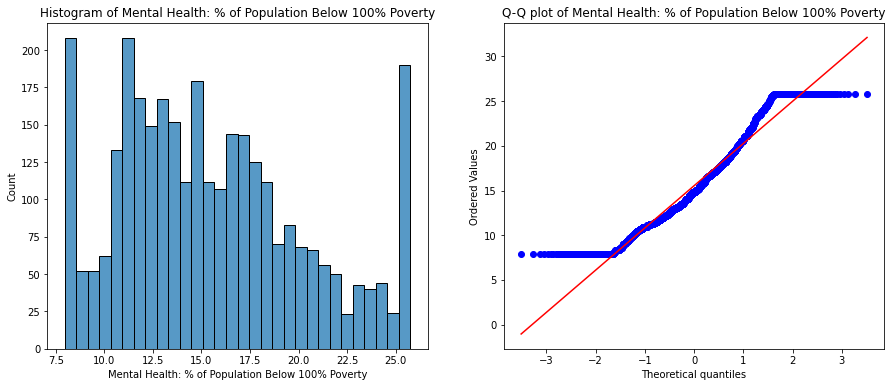

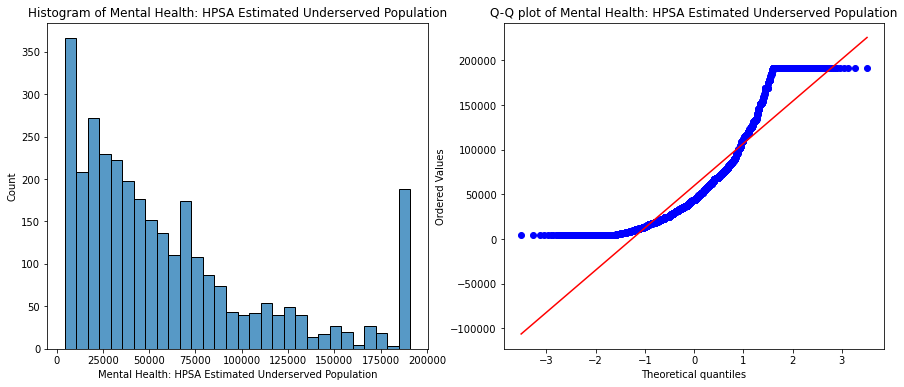

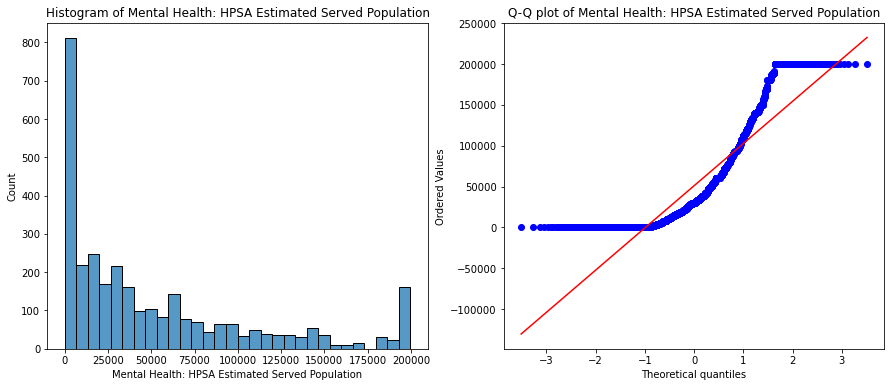

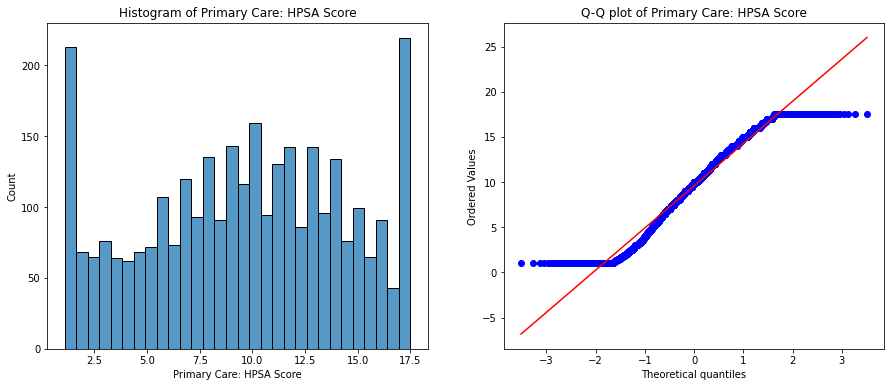

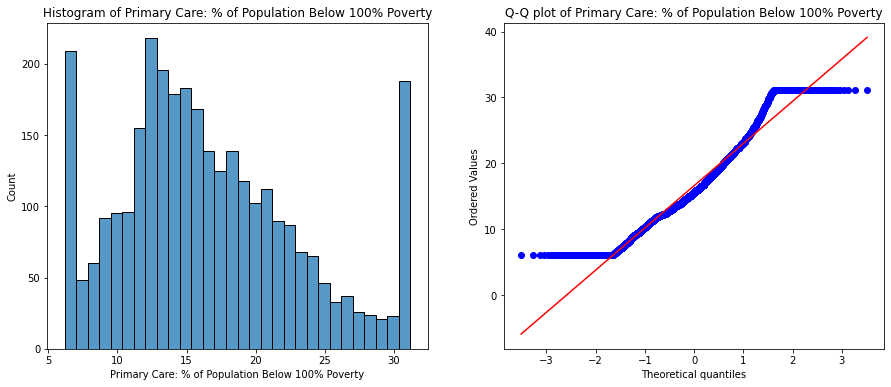

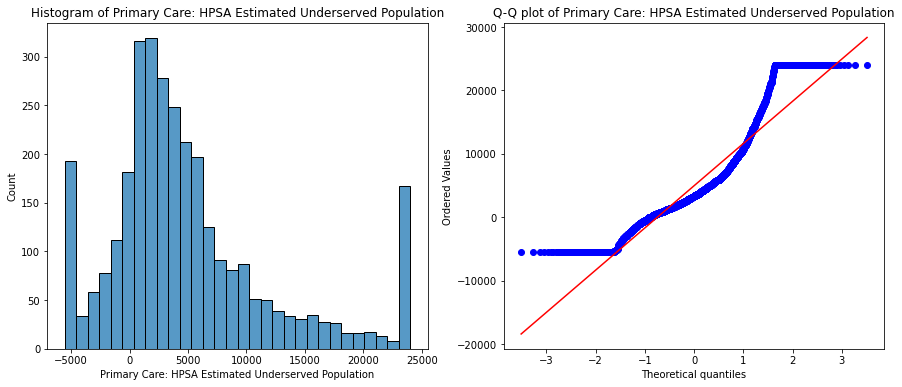

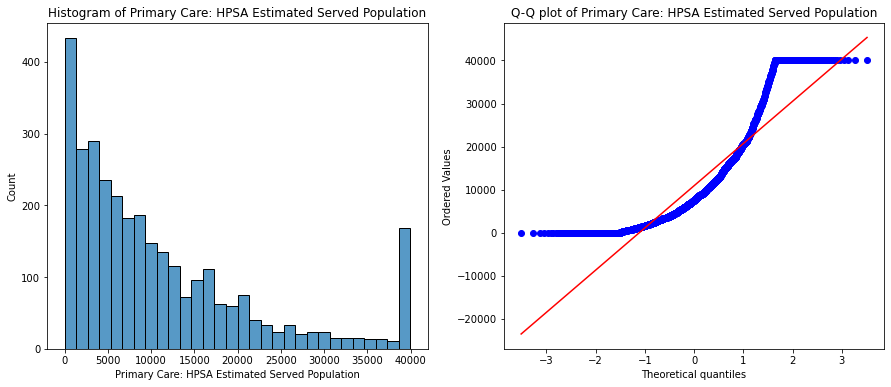

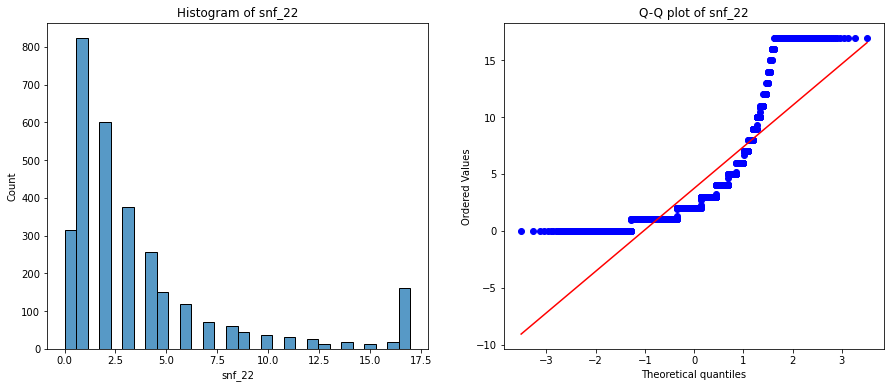

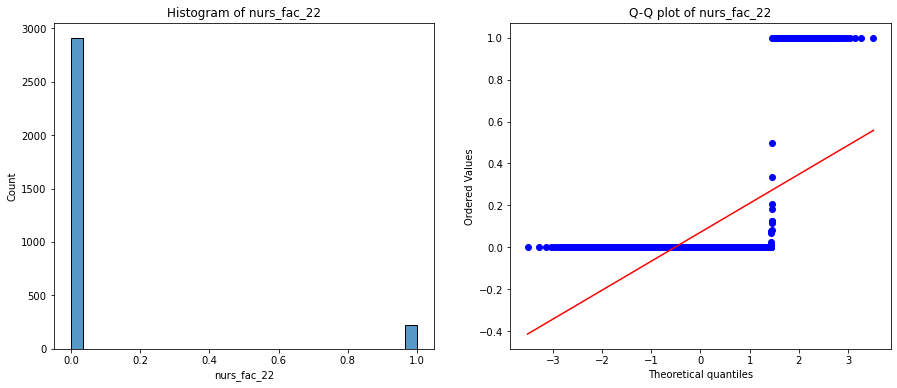

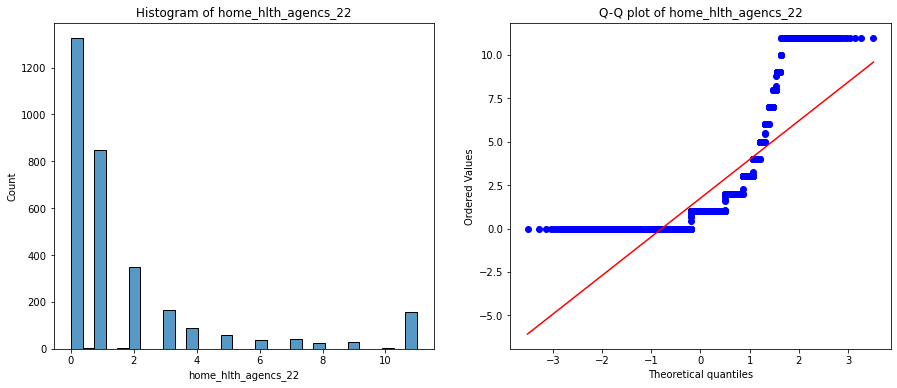

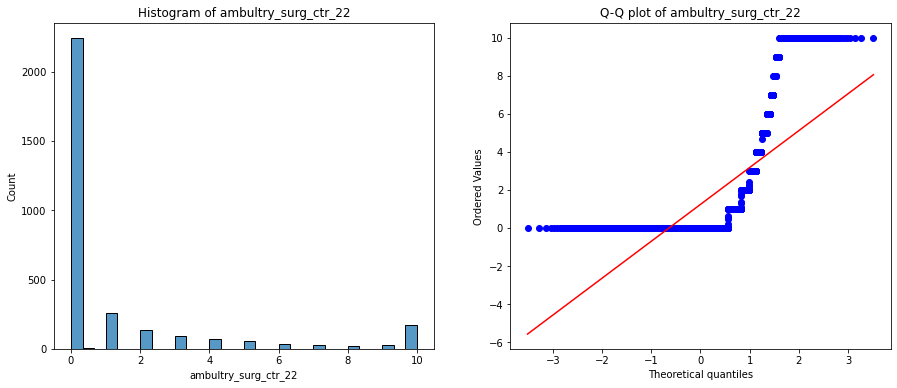

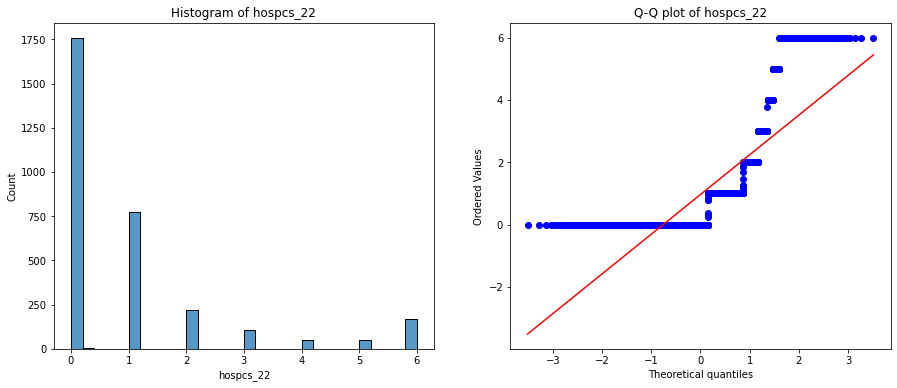

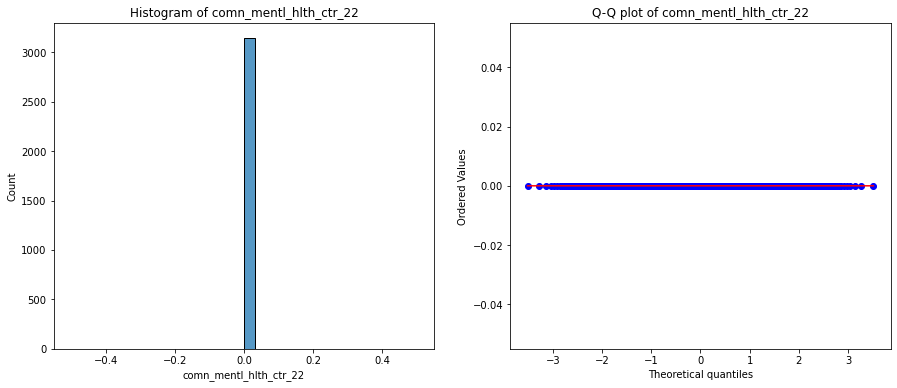

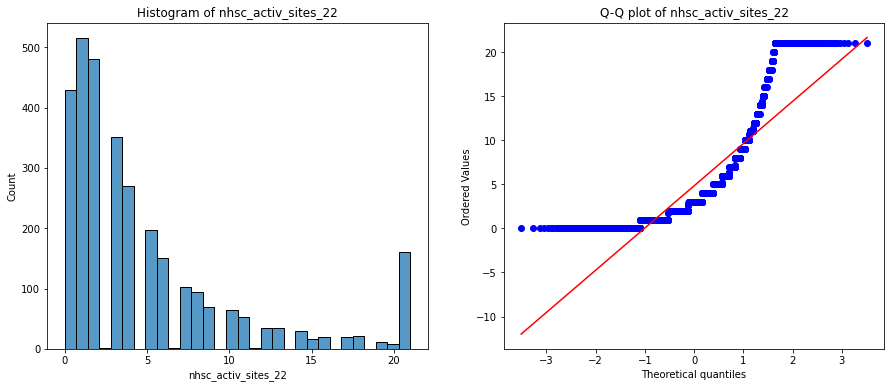

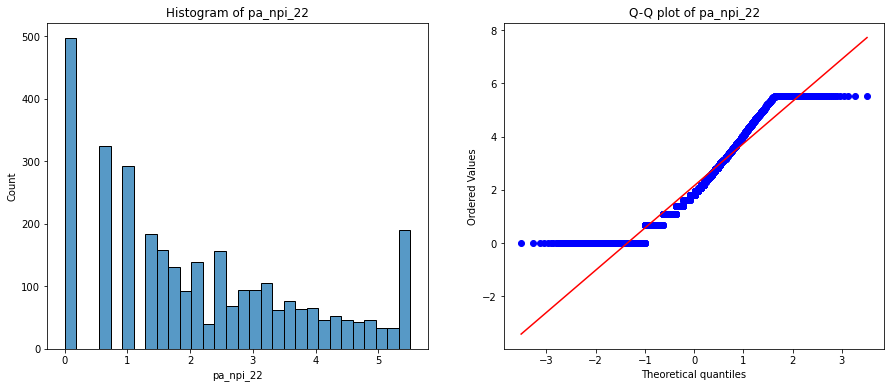

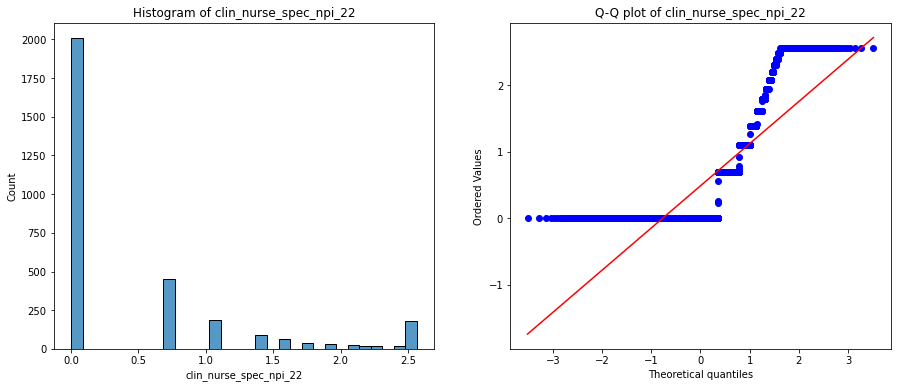

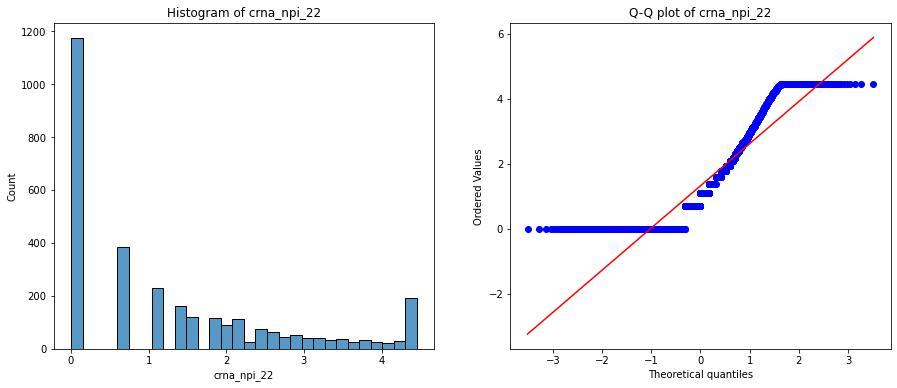

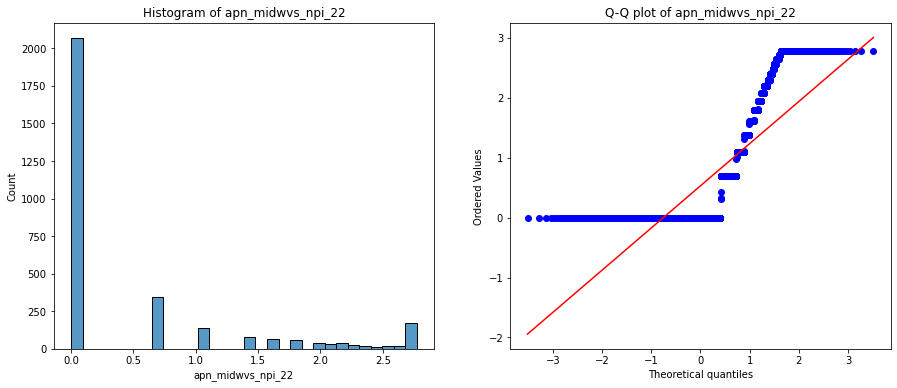

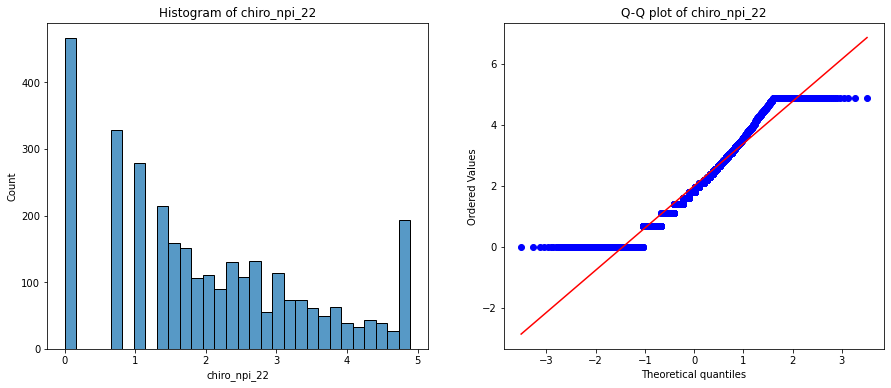

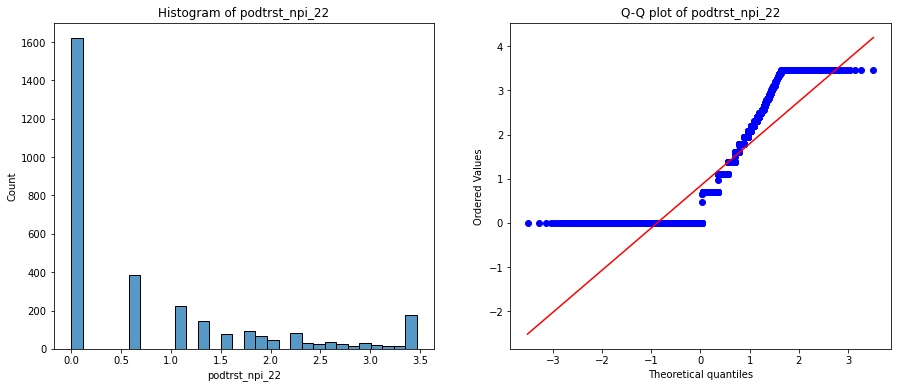

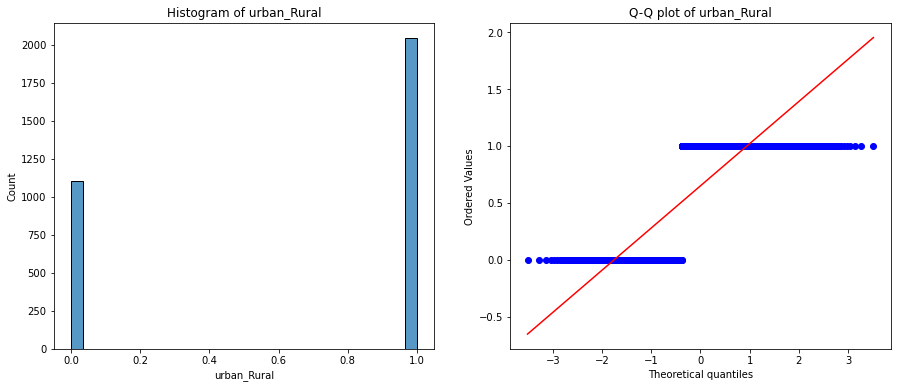

In [66]:
col_list = [column for column in df_copy.select_dtypes(include = np.number).columns if column not in ['fips','analysis_value']]
for column in col_list:
    diagnostic_plots(df_win,column)